# Poly substance use and it's effect on perceived mental health

In [227]:
# Use unsupervised clustering to identify the clusters (only can use models that are able to work with categorical data)
# Check association of the created clusters to perceived mental health status

In [228]:
!pip install prince

In [229]:
!pip install pgmpy

In [230]:
# importing neccesssary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd
import math


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# MODELING
from prince import MCA
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

import plotly.express as px

# MODEL PERFORMANCE_LCA
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.utils import resample

In [231]:
import seaborn as sns
import sklearn
from sklearn.metrics import silhouette_score

In [232]:
! pip install imblearn

In [233]:
# Load CSV file
data = pd.read_csv(r"C:\Users\anagh\OneDrive\Desktop\Sem 4\capstone\Canada Tobacco, Nicotine Survey 2023\CSV\Data_Données\pumf.csv")

In [234]:
len(data)

12133

In [235]:
data.head(2)

PUMFID  TBC_05A  TBC_05BR  TBC_10AR  TBC_10BR  TBC_15  TBC_20R  TBC_25QR  \
0   65183        2        96         6         6       6        6        96   
1   65184        2        96         6         6       6        6        96   

   TBC_30AR  TBC_30BR  ...  DV_VP30R  DVVP30BR  DVCAN30B  DV_VC30  DV_VC30B  \
0        96        96  ...         2         3         3        2         3   
1        96        96  ...         2         3         2        1         2   

   FIRSTTRR  DV_ALC30  DV_CAN30     WTPP   VERDATE  
0         2         1         2   699.07  1-Feb-24  
1         2         1         1  1785.51  1-Feb-24  

[2 rows x 88 columns]

In [236]:
data.columns
# coded column names ---> need to be changed into understandable column names

Index(['PUMFID', 'TBC_05A', 'TBC_05BR', 'TBC_10AR', 'TBC_10BR', 'TBC_15',
       'TBC_20R', 'TBC_25QR', 'TBC_30AR', 'TBC_30BR', 'TBC_30CR', 'TBC_30DR',
       'TBC_30ER', 'TBC_30FR', 'TBC_30GR', 'TBC_35', 'TBC_40', 'TBC_41A',
       'TBC_41BR', 'TBC_45AR', 'TBC_45B', 'TBC_45F', 'TBC_45GR', 'TBC_50R',
       'OTP_05AR', 'OTP_05BR', 'OTP_05CR', 'OTP_05DR', 'OTP_05ER', 'VAP_05AR',
       'VAP_05BR', 'VAP_10R', 'VAP_15AR', 'VAP_15BR', 'VAP_15CR', 'VAP_20R',
       'VAP_21R', 'VAP_30R', 'VAP_35R', 'VAP_40AR', 'VAP_40BR', 'VAP_40HR',
       'VAP_41AR', 'VAP_41BR', 'VAP_41IR', 'VAP_45R', 'VAP_60', 'CAN_05A',
       'CAN_05BR', 'CAN_10A', 'CAN_10BR', 'CAN_15AR', 'CAN_15BR', 'CAN_17R',
       'CAN_20A', 'CAN_20BR', 'CAN_25AR', 'CAN_25BR', 'CAN_30AR', 'CAN_30BR',
       'CAN_30CR', 'CAN_30G', 'IU_05R', 'ALC_05', 'ALC_10R', 'GENDER',
       'AGEGROUP', 'PROV_C', 'ED_05R', 'INDFLGR', 'PGDVFLR', 'SORFLGR',
       'LTC_10R', 'GEN_01', 'GEN_05', 'DV_SS', 'DV_SSB', 'CIGWAVR', 'DV_VP30R',
       'DVVP3

# Data Cleaning

In [237]:
# Initial cleaning before visualization
data.isnull().sum() # No null values # But the data contains non-stated and valid skip values

PUMFID      0
TBC_05A     0
TBC_05BR    0
TBC_10AR    0
TBC_10BR    0
           ..
FIRSTTRR    0
DV_ALC30    0
DV_CAN30    0
WTPP        0
VERDATE     0
Length: 88, dtype: int64

In [238]:
# Renaming feature names
# Dictionary mapping variable codes to descriptions (extracted from PDF)
column_mapping = {
    "PUMFID": "Random ID",
    "TBC_05A": "Smoked a cigarette - lifetime",
    "TBC_05BR": "Age first time smoked whole cigarette",
    "TBC_10AR": "Frequency smoked cigarettes - past 30 days",
    "TBC_10BR": "Days smoked per week - past 30 days",
    "TBC_15": "Smoked at least 100 cigarettes - lifetime",
    "TBC_20R": "When stopped smoking cigarettes",
    "TBC_25QR": "Month stopped smoking",
    "TBC_30AR": "Number of cigarettes smoked - Day 1",
    "TBC_30BR": "Number of cigarettes smoked - Day 2",
    "TBC_30CR": "Number of cigarettes smoked - Day 3",
    "TBC_30DR": "Number of cigarettes smoked - Day 4",
    "TBC_30ER": "Number of cigarettes smoked - Day 5",
    "TBC_30FR": "Number of cigarettes smoked - Day 6",
    "TBC_30GR": "Number of cigarettes smoked - Day 7",
    "TBC_35": "Times stopped smoking - past 12 months",
    "TBC_40": "Tried quitting by switching to vaping",
    "GENDER": "Gender",
    "AGEGROUP": "Age Group",
    "PROV_C": "Province of Residence",
    "DV_SS": "Smoking Status (3 levels)"
}
# Rename columns
data.rename(columns=column_mapping, inplace=True)


data.head(2)


Random ID  Smoked a cigarette - lifetime  \
0      65183                              2   
1      65184                              2   

   Age first time smoked whole cigarette  \
0                                     96   
1                                     96   

   Frequency smoked cigarettes - past 30 days  \
0                                           6   
1                                           6   

   Days smoked per week - past 30 days  \
0                                    6   
1                                    6   

   Smoked at least 100 cigarettes - lifetime  When stopped smoking cigarettes  \
0                                          6                                6   
1                                          6                                6   

   Month stopped smoking  Number of cigarettes smoked - Day 1  \
0                     96                                   96   
1                     96                                   96   

   Number of cigarettes smoked - Day 2  ...  DV_VP30R  DVVP30BR  DVCAN30B  \
0                                   96  ...         2         3         3   
1                                   96  ...         2         3         2   

   DV_VC30  DV_VC30B  FIRSTTRR  DV_ALC30  DV_CAN30     WTPP   VERDATE  
0        2         3         2         1         2   699.07  1-Feb-24  
1        1         2         2         1         1  1785.51  1-Feb-24  

[2 rows x 88 columns]

In [239]:
# Rename remaining feature names
column_mapping = {
    "TBC_41A": "Used vaping device with nicotine",
    "TBC_41BR": "Used vaping device without nicotine/unknown",
    "TBC_45AR": "Did to quit smoking - Deal with friend/family or used app",
    "TBC_45B": "Did to quit smoking - Reduced cigarettes smoked",
    "TBC_45F": "Did to quit smoking - Tried to quit on own",
    "TBC_45GR": "Did to quit smoking - Other",
    "TBC_50R": "Used nicotine replacement products",
    "OTP_05AR": "Frequency smoked - Little cigars/cigarillos - past 30 days",
    "OTP_05BR": "Frequency smoked - Cigars - past 30 days",
    "OTP_05CR": "Frequency smoked - Tobacco in traditional pipe - past 30 days",
    "OTP_05DR": "Frequency smoked - Chewing tobacco/snuff - past 30 days",
    "OTP_05ER": "Frequency smoked - Tobacco water-pipe - past 30 days",
    "VAP_05AR": "Tried vaping - lifetime",
    "VAP_05BR": "Age first time tried vaping",
    "VAP_10R": "Frequency vaped - past 30 days",
    "VAP_15AR": "Days vaped e-liquid with nicotine - past 30 days",
    "VAP_15BR": "Days vaped e-liquid without nicotine - past 30 days",
    "VAP_15CR": "Days vaped e-liquid unknown content - past 30 days",
    "VAP_20R": "Times picked up vaping device - days vaped",
    "VAP_21R": "Puffs taken each time vaping device is picked up",
    "VAP_30R": "Flavour vaped most often",
    "VAP_35R": "Main reason for vaping - currently",
    "VAP_40AR": "Where get vaping devices - Vape shop",
    "VAP_40BR": "Where get vaping devices - Store or online",
    "VAP_40HR": "Where get vaping devices - Other",
    "VAP_41AR": "Where get vaping liquids - Vape shop",
    "VAP_41BR": "Where get vaping liquids - Store or online",
    "VAP_41IR": "Where get vaping liquids - Other",
    "VAP_45R": "Times stopped vaping - past 12 months",
    "VAP_60": "Perception of harm - Vaping vs cigarettes",
    "CAN_05A": "Smoked cannabis - lifetime",
    "CAN_05BR": "Age first time smoked cannabis",
    "CAN_10A": "Frequency smoked cannabis - past 30 days",
    "CAN_10BR": "Days smoked cannabis at least once - past 30 days",
    "CAN_15AR": "Frequency smoked cannabis/tobacco mix - past 30 days",
    "CAN_15BR": "Days smoked cannabis/tobacco mix - past 30 days",
    "CAN_17R": "Frequency consumed cannabis edibles - past 30 days",
    "CAN_20A": "Vaped cannabis - lifetime",
    "CAN_20BR": "Age first time vaped cannabis",
    "CAN_25AR": "Frequency vaped cannabis - past 30 days",
    "CAN_25BR": "Days vaped cannabis at least once - past 30 days",
    "CAN_30AR": "Where get cannabis device/liquid - Store/Online",
    "CAN_30BR": "Where get cannabis devices/liquids - Family/Acquaintance",
    "CAN_30CR": "Where get cannabis devices/liquids - Other",
    "CAN_30G": "Where get cannabis devices/liquids - A friend",
    "IU_05R": "Tried first substance",
    "ALC_05": "Drank alcohol - past 30 days",
    "ALC_10R": "Drank 4+ drinks on one occasion - past 12 months",
    "GENDER": "Gender",
    "AGEGROUP": "Age Group",
    "PROV_C": "Province of Residence",
    "ED_05R": "Highest certificate/diploma/degree completed",
    "INDFLGR": "Indigenous identity flag",
    "PGDVFLR": "Visible minority flag",
    "SORFLGR": "Sexual identity flag",
    "LTC_10R": "Person with disability (self-declared)",
    "GEN_01": "Perceived health",
    "GEN_05": "Perceived mental health",
    "DV_SS": "Smoking Status (3 levels)",
    "DV_SSB": "Smoking Status (4 levels)",
    "CIGWAVR": "Avg cigarettes smoked per day (weekly basis)",
    "DV_VP30R": "Vaped in the past 30 days (2 levels)",
    "DVVP30BR": "Vaped in the past 30 days (3 levels)",
    "DVCAN30B": "Cannabis smoked in the past 30 days (3 levels)",
    "DV_VC30": "Vaped cannabis in the past 30 days (2 levels)",
    "DV_VC30B": "Vaped cannabis in the past 30 days (3 levels)",
    "FIRSTTRR": "First product tried",
    "DV_ALC30": "Consumed alcohol in the past 30 days",
    "DV_CAN30": "Cannabis smoked in the past 30 days (2 levels)",
    "WTPP": "Survey weight - PUMF",
    "VERDATE": "Date of file creation"
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)


In [240]:
data.columns

Index(['Random ID', 'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to 

# DEEP DIVE INTO FEATURES

### TARGET VARIABLE (Perceived Mental Health)

In [241]:
# Perceived mental health
data["Perceived mental health"].unique() # Perceived mental health column has 5 values ranging from 1 t0 5 excellent to worst

array([2, 1, 4, 3, 5, 9])

In [242]:
# Target variable 
data["Perceived mental health"].replace({1:"Excellent",2:"Very good",3:"Good",4:"Fair",5:"Poor",9:"Not Stated"}).value_counts()

Perceived mental health
Very good     3747
Good          3586
Excellent     2626
Fair          1661
Poor           488
Not Stated      25
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

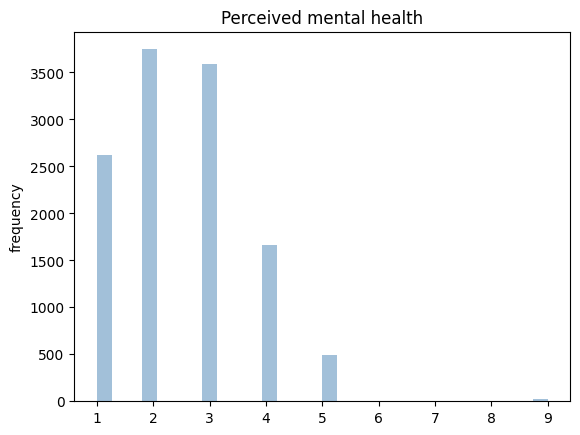

In [243]:
# Visualization of the target variable category
plt.hist(data["Perceived mental health"], bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');
plt.title("Perceived mental health")
plt.ylabel("frequency")
# Insights
# Most of the respondents responded " Very Good"

In [244]:
# 1---> excellent 5---> bad

In [245]:
# There few values that is 9. (not stated) . We can remove the 9.

In [246]:
data=data[data["Perceived mental health"].isin([1,2,3,4,5])] # Removig the respondents who did not answer the question

In [247]:
data["Perceived mental health"].unique() # 9 is removed

array([2, 1, 4, 3, 5])

-----------------------------------------------------

In [248]:
################################

## Demographic Features

In [249]:
# Looking into demographic data lets us know whether the data is biased

In [250]:
# Demographic variables
Dem_var=['Age Group', 'Province of Residence',
       'Highest certificate/diploma/degree completed',
       'Indigenous identity flag', 'Visible minority flag',
       'Sexual identity flag', 'Person with disability (self-declared)',"Perceived mental health" ]

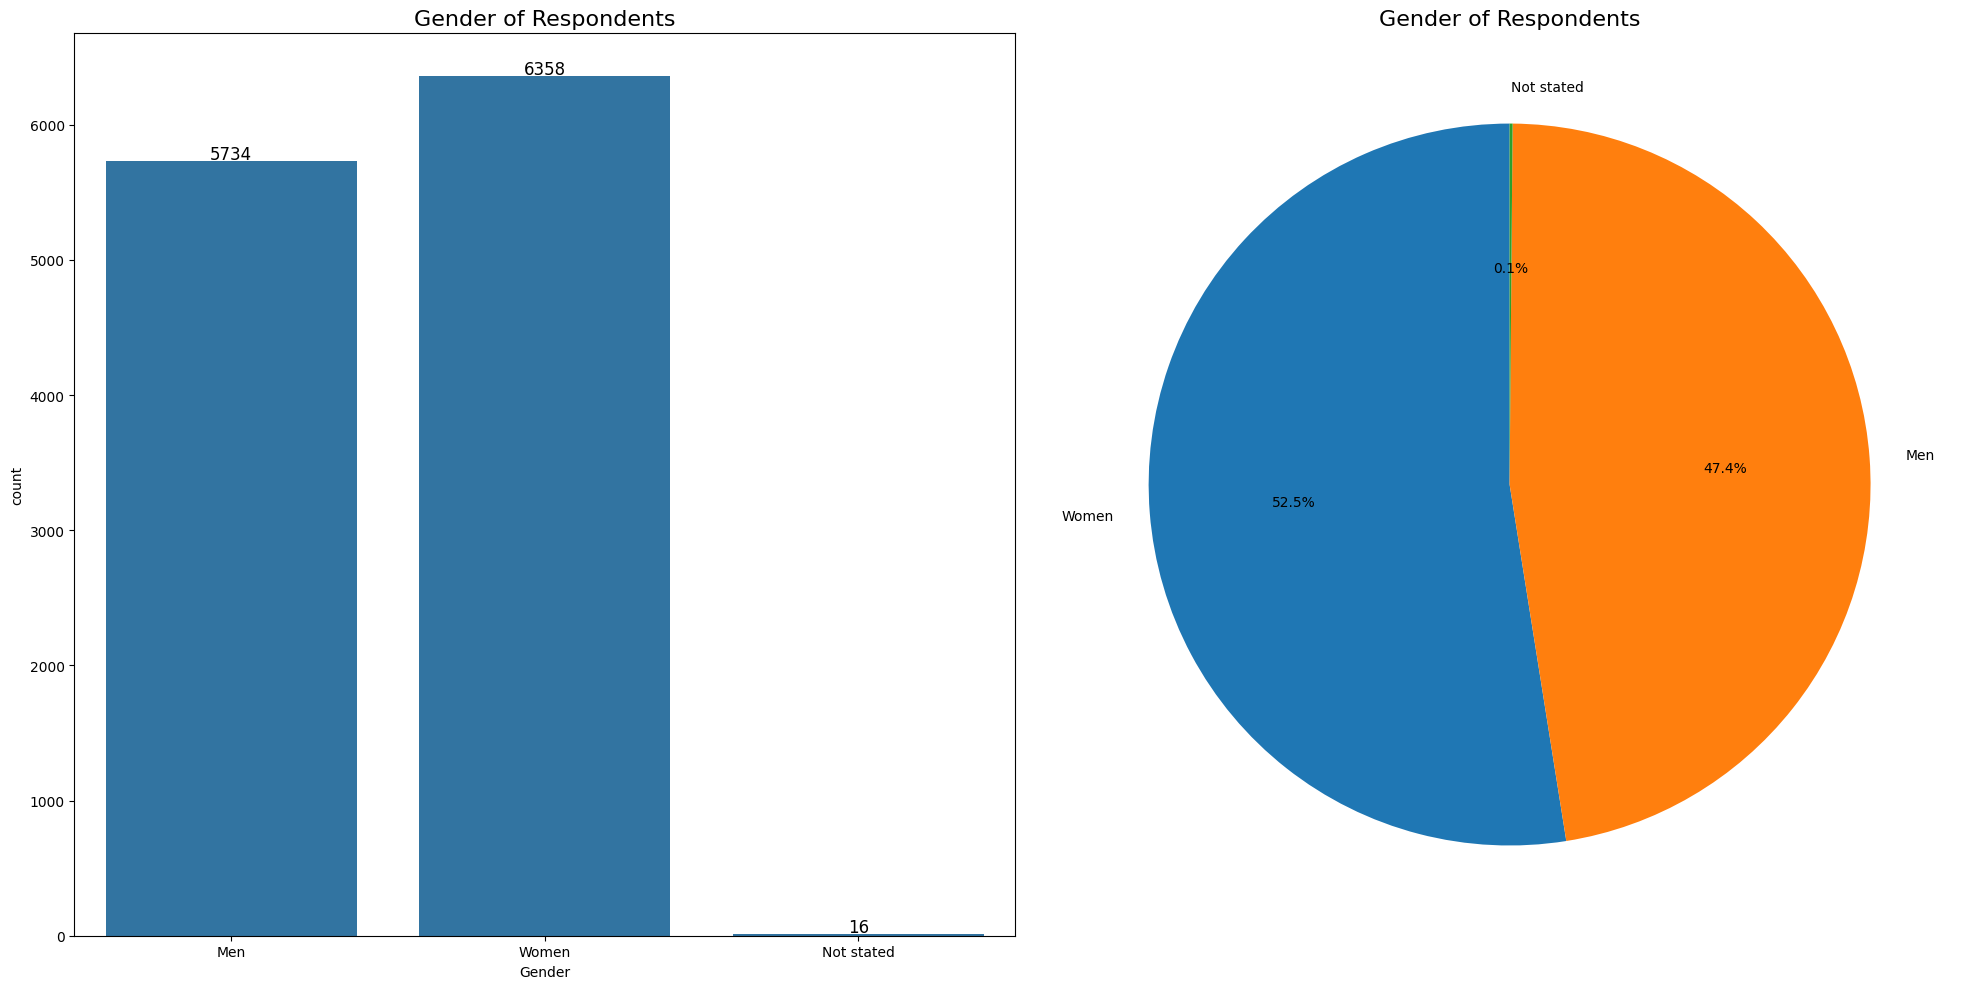

In [251]:
# Respondents
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Gender", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1,2]) 
ax.set_xticklabels(["Men", "Women","Not stated"]) 
plt.title('Gender of Respondents', fontsize=16)

plt.subplot(1,2,2)
Gender_counts = data["Gender"].value_counts()
# Plot the pie chart
plt.pie(Gender_counts, labels=["Women","Men","Not stated"], autopct='%1.1f%%',startangle=90)
plt.title('Gender of Respondents', fontsize=16)


plt.tight_layout()
plt.show()
# The data is not biased relative to Gender

In [252]:
# The data is not biased

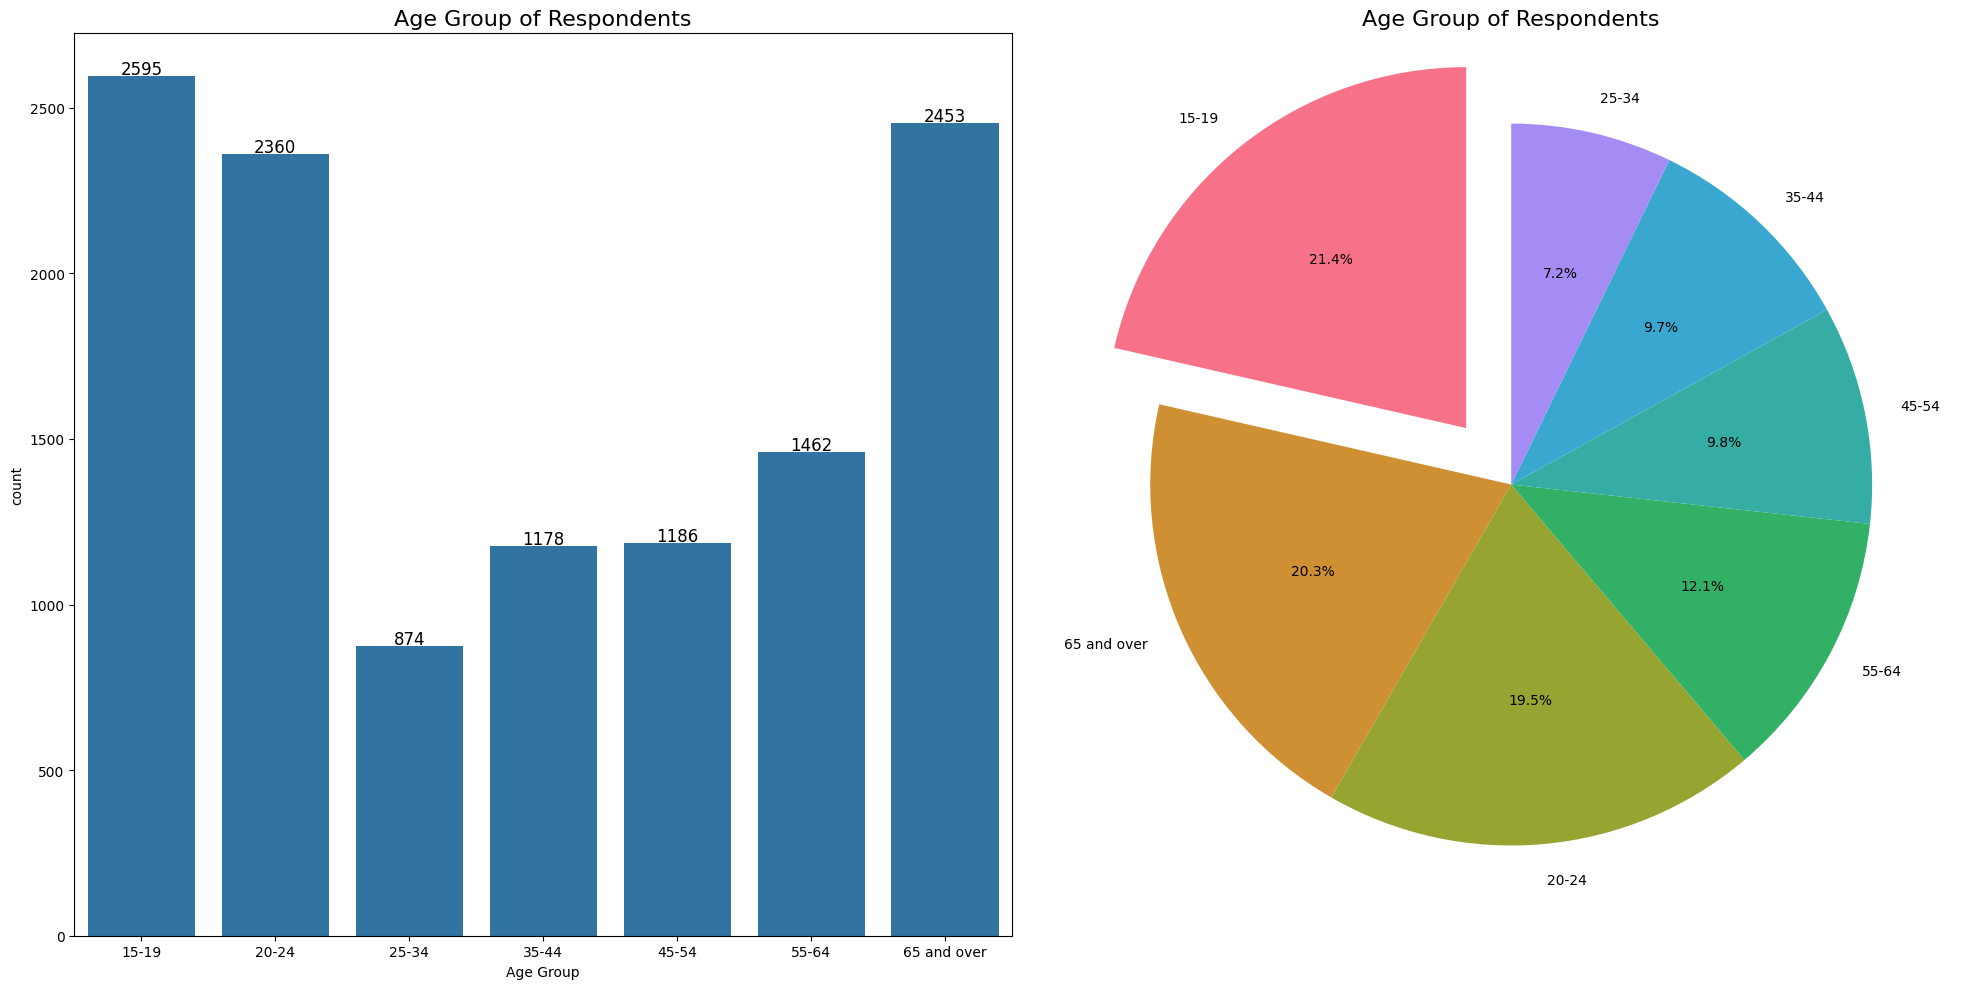

In [253]:
# Respondents (Agegroup)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Age Group", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
ax.set_xticks(range(7))
ax.set_xticklabels(["15-19", "20-24","25-34","35-44","45-54","55-64","65 and over"]) 
plt.title('Age Group of Respondents', fontsize=16)

plt.subplot(1,2,2)
Age_group_counts = data["Age Group"].value_counts()
# Plot the pie chart
plt.pie(Age_group_counts, labels=["15-19", "65 and over", "20-24", "55-64", "45-54","35-44", "25-34"], autopct='%1.1f%%',startangle=90,explode = [0.2,0,0,0,0,0,0], colors = sns.color_palette("husl", 8))
plt.title('Age Group of Respondents', fontsize=16)


plt.tight_layout()
plt.show()

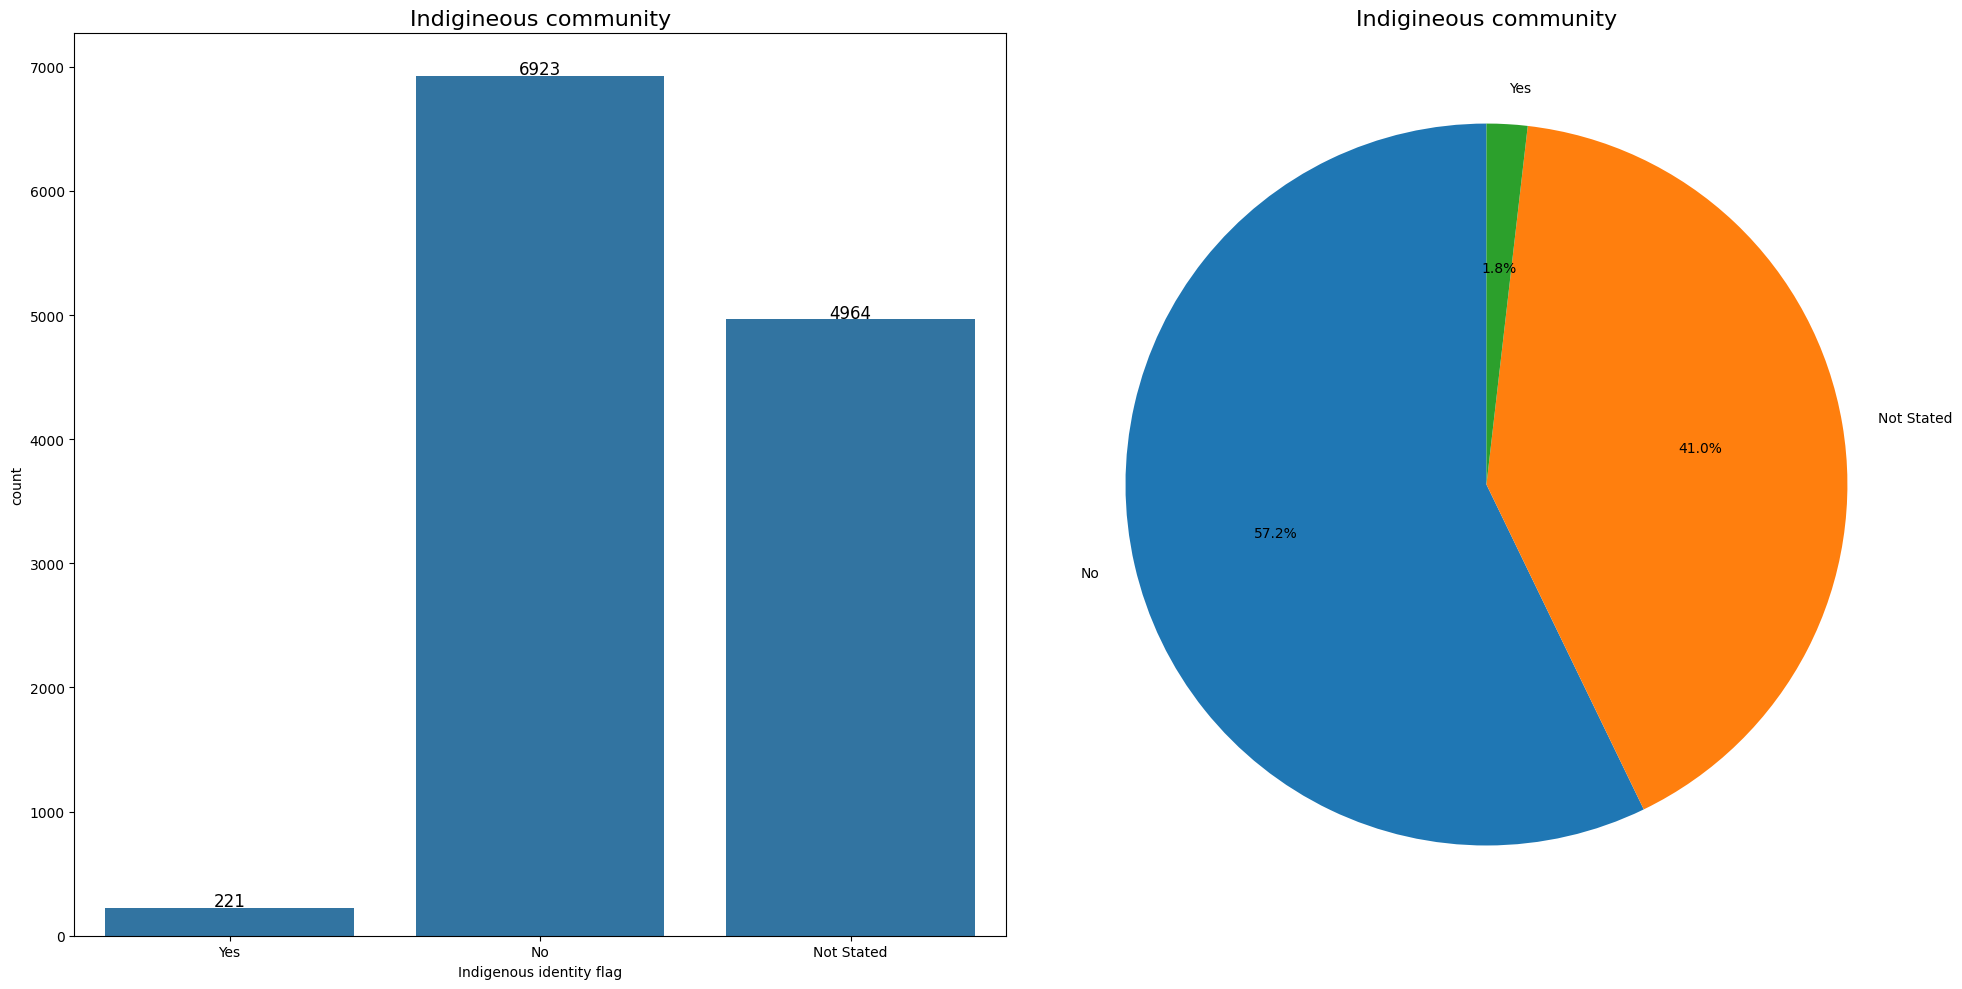

In [254]:
# Respondents (indigeneous flag)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Indigenous identity flag", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1,2]) 
ax.set_xticklabels(["Yes", "No","Not Stated"]) 
plt.title('Indigineous community', fontsize=16)

plt.subplot(1,2,2)
Ind_counts = data["Indigenous identity flag"].value_counts()
# Plot the pie chart
plt.pie(Ind_counts, labels=["No","Not Stated","Yes"], autopct='%1.1f%%',startangle=90)
plt.title('Indigineous community', fontsize=16)


plt.tight_layout()
plt.show()

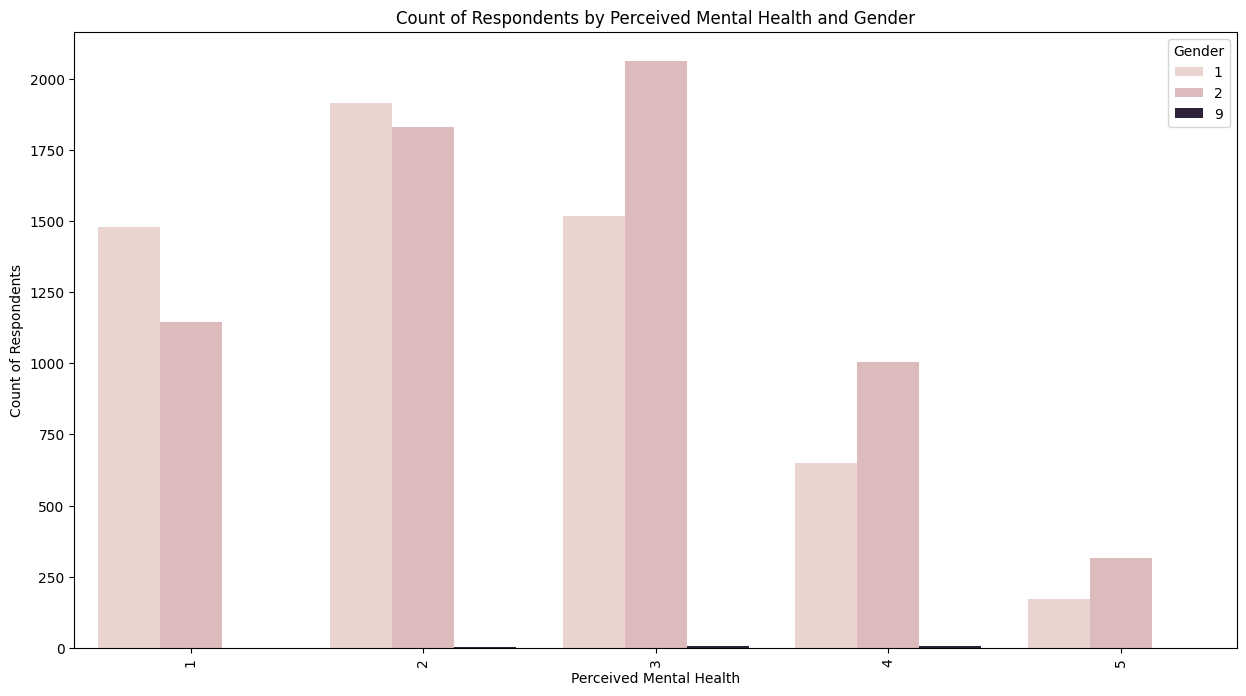

In [255]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x="Perceived mental health", hue="Gender")

plt.xticks(rotation=90)
plt.xlabel("Perceived Mental Health")
plt.ylabel("Count of Respondents")
plt.title("Count of Respondents by Perceived Mental Health and Gender")
plt.show()

# 1---> men 2----> women
#1---> Excellent 5---> poor

In [256]:
# Comparitevely women tend to have poor mental health than men among the respondents

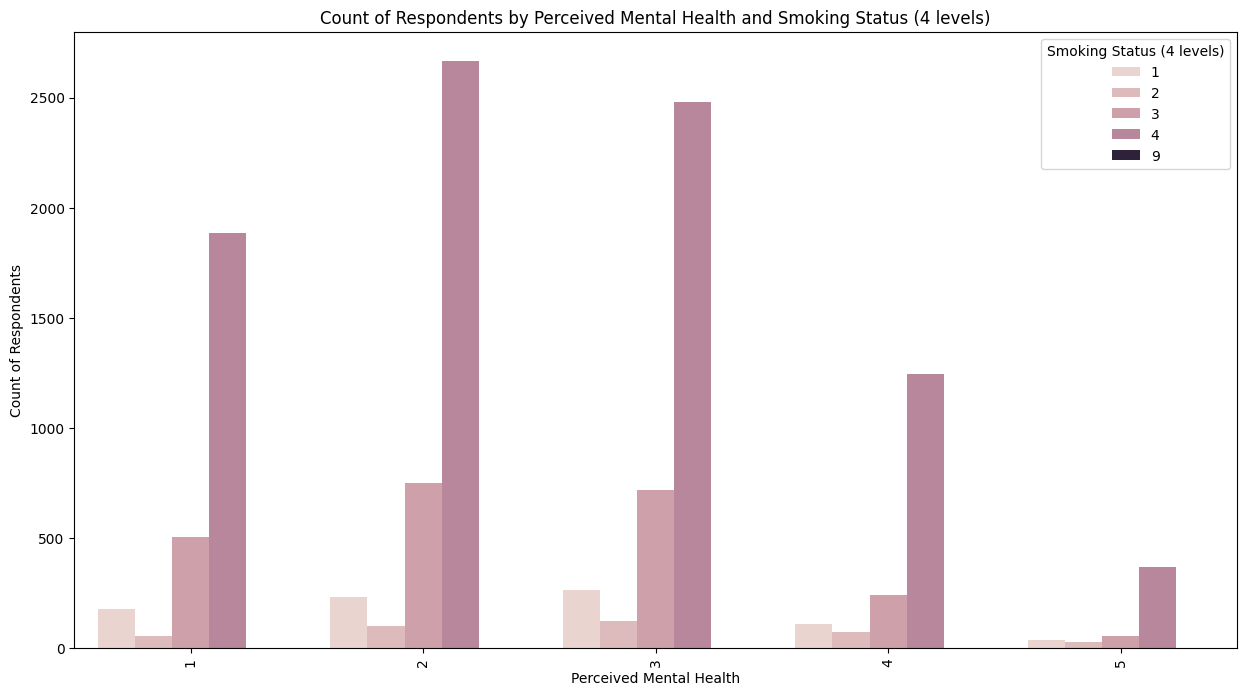

In [257]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x="Perceived mental health", hue="Smoking Status (4 levels)")

plt.xticks(rotation=90)
plt.xlabel("Perceived Mental Health")
plt.ylabel("Count of Respondents")
plt.title("Count of Respondents by Perceived Mental Health and Smoking Status (4 levels)")
plt.show()

#Daily smoker 1 
#Occasional smoker 2 
#Former smoker 3 
#Never smoked 4 
#Not stated 9

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12108 entries, 0 to 12132
Data columns (total 88 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Random ID                                                      12108 non-null  int64  
 1   Smoked a cigarette - lifetime                                  12108 non-null  int64  
 2   Age first time smoked whole cigarette                          12108 non-null  int64  
 3   Frequency smoked cigarettes - past 30 days                     12108 non-null  int64  
 4   Days smoked per week - past 30 days                            12108 non-null  int64  
 5   Smoked at least 100 cigarettes - lifetime                      12108 non-null  int64  
 6   When stopped smoking cigarettes                                12108 non-null  int64  
 7   Month stopped smoking                                          

## CORRELATION (features and target variable)

In [259]:
# for correlation lets use cramers(nominal) categorical values

In [260]:
data

Random ID  Smoked a cigarette - lifetime  \
0          65183                              2   
1          65184                              2   
2          65185                              2   
3          65186                              2   
4          65187                              2   
...          ...                            ...   
12128      77311                              1   
12129      77312                              1   
12130      77313                              1   
12131      77314                              1   
12132      77315                              1   

       Age first time smoked whole cigarette  \
0                                         96   
1                                         96   
2                                         96   
3                                         96   
4                                         96   
...                                      ...   
12128                                      3   
12129                                      2   
12130                                      2   
12131                                      2   
12132                                      1   

       Frequency smoked cigarettes - past 30 days  \
0                                               6   
1                                               6   
2                                               6   
3                                               6   
4                                               6   
...                                           ...   
12128                                           4   
12129                                           4   
12130                                           4   
12131                                           1   
12132                                           4   

       Days smoked per week - past 30 days  \
0                                        6   
1                                        6   
2                                        6   
3                                        6   
4                                        6   
...                                    ...   
12128                                    6   
12129                                    6   
12130                                    6   
12131                                    6   
12132                                    6   

       Smoked at least 100 cigarettes - lifetime  \
0                                              6   
1                                              6   
2                                              6   
3                                              6   
4                                              6   
...                                          ...   
12128                                          2   
12129                                          1   
12130                                          1   
12131                                          1   
12132                                          2   

       When stopped smoking cigarettes  Month stopped smoking  \
0                                    6                     96   
1                                    6                     96   
2                                    6                     96   
3                                    6                     96   
4                                    6                     96   
...                                ...                    ...   
12128                                6                     96   
12129                                3                     96   
12130                                3                     96   
12131                                6                     96   
12132                                6                     96   

       Number of cigarettes smoked - Day 1  \
0                                       96   
1                                       96   
2                                       96   
3                                    

In [261]:
#cramer's fn
# Function to calculate Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Modelling

In [262]:
data.columns

Index(['Random ID', 'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to 

In [263]:
data=data.drop(["Date of file creation","Random ID","Survey weight - PUMF"],axis=1)#"Survey weight - PUMF"]

In [264]:
data.columns

Index(['Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to quit on own',

In [265]:
clus_1_data=data[['Age Group','Gender', 'Province of Residence','Highest certificate/diploma/degree completed','Indigenous identity flag', 'Visible minority flag','Sexual identity flag', 'Person with disability (self-declared)','Perceived health', 'Smoking Status (4 levels)','Vaped in the past 30 days (3 levels)','Cannabis smoked in the past 30 days (3 levels)','Vaped cannabis in the past 30 days (3 levels)', 'First product tried','Consumed alcohol in the past 30 days']].copy()

In [266]:
clus_1_data.columns

Index(['Age Group', 'Gender', 'Province of Residence',
       'Highest certificate/diploma/degree completed',
       'Indigenous identity flag', 'Visible minority flag',
       'Sexual identity flag', 'Person with disability (self-declared)',
       'Perceived health', 'Smoking Status (4 levels)',
       'Vaped in the past 30 days (3 levels)',
       'Cannabis smoked in the past 30 days (3 levels)',
       'Vaped cannabis in the past 30 days (3 levels)', 'First product tried',
       'Consumed alcohol in the past 30 days'],
      dtype='object')

In [267]:
# Taking The required variables (drug use) (include substance use categories and mental and physical health along with demographic features)

In [268]:
# let's visualize the distribution

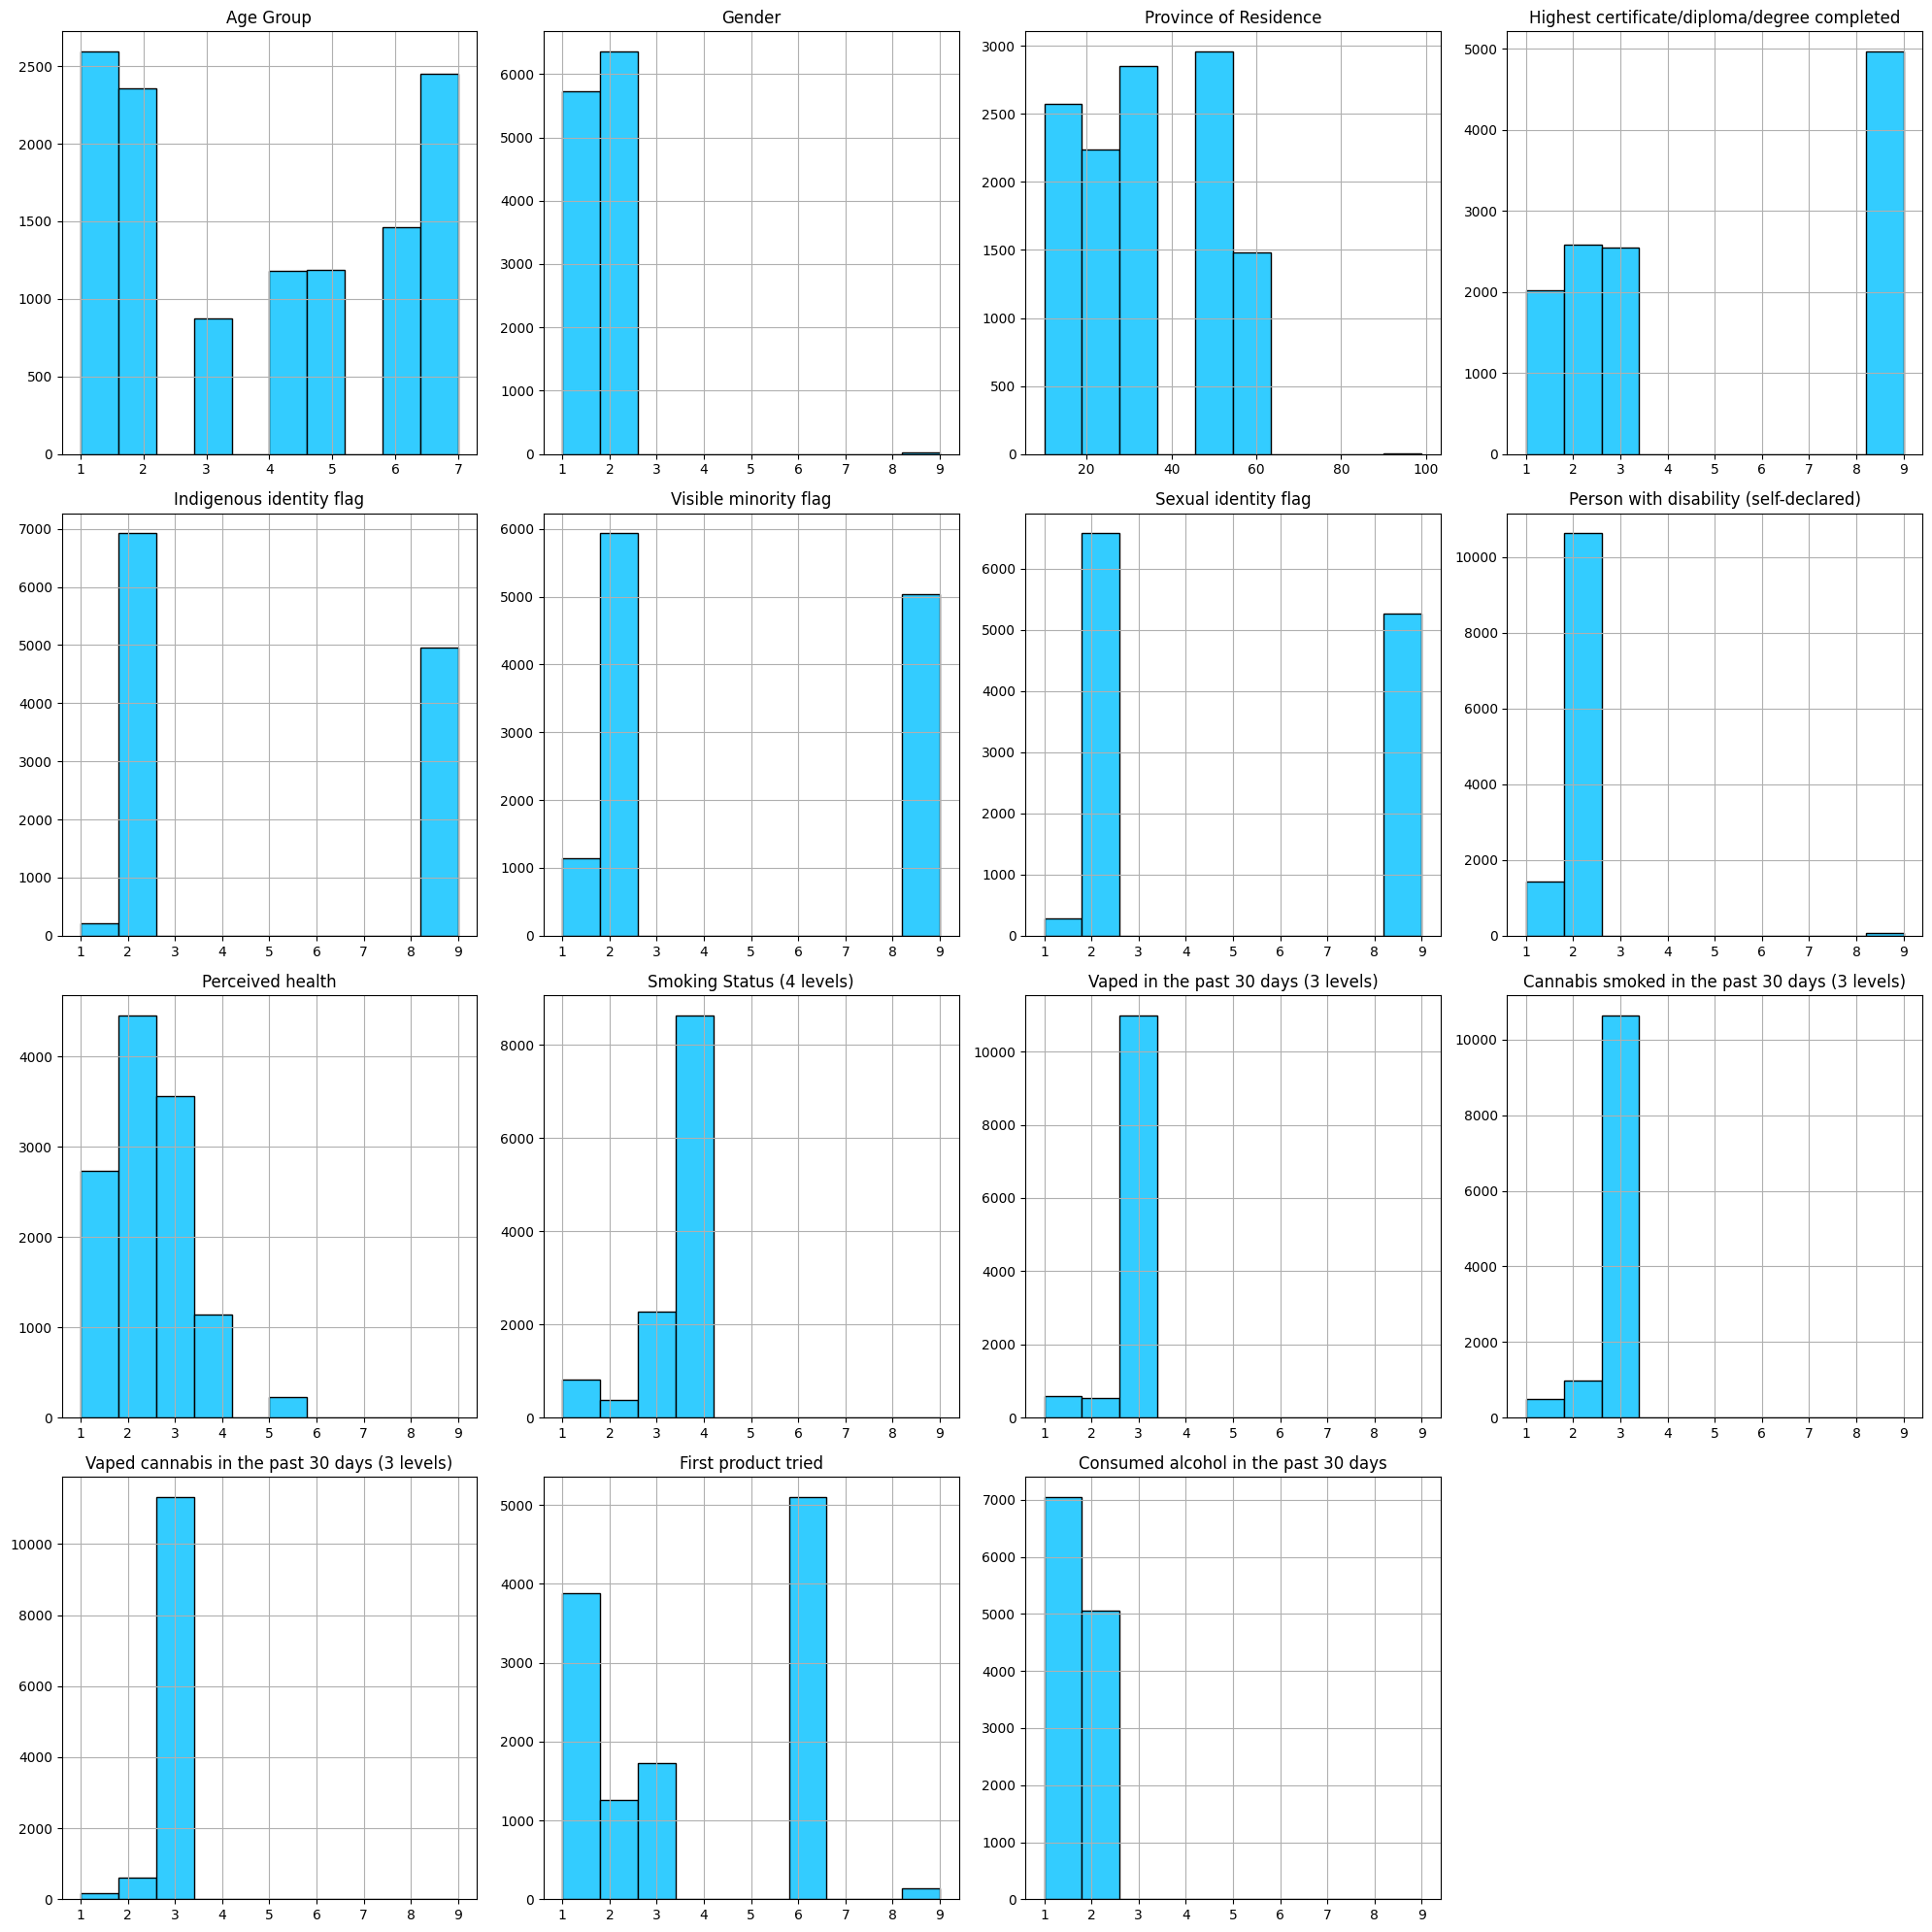

In [269]:
# Distribution of variables of cleaned data
clus_1_data.hist(figsize=(20, 20), bins=10, color='#33CCFF', edgecolor='black')
plt.tight_layout()
plt.show()

In [270]:
clus_1_data.columns

Index(['Age Group', 'Gender', 'Province of Residence',
       'Highest certificate/diploma/degree completed',
       'Indigenous identity flag', 'Visible minority flag',
       'Sexual identity flag', 'Person with disability (self-declared)',
       'Perceived health', 'Smoking Status (4 levels)',
       'Vaped in the past 30 days (3 levels)',
       'Cannabis smoked in the past 30 days (3 levels)',
       'Vaped cannabis in the past 30 days (3 levels)', 'First product tried',
       'Consumed alcohol in the past 30 days'],
      dtype='object')

In [271]:
# percentage of values
for i in clus_1_data.columns:
    print(f"{i}:{(clus_1_data[i].value_counts()/len(clus_1_data))*100}")
# Highest Certificate, Indigineous identity,minority flag,Sexual identity flag has many not stated values

Age Group:Age Group
1    21.432111
7    20.259333
2    19.491245
6    12.074661
5     9.795177
4     9.729105
3     7.218368
Name: count, dtype: float64
Gender:Gender
2    52.510737
1    47.357119
9     0.132144
Name: count, dtype: float64
Province of Residence:Province of Residence
35    23.554675
24    18.467129
59    12.264618
48    10.910142
46     7.119260
47     6.417245
12     5.880410
13     5.525273
10     5.021473
11     4.831516
99     0.008259
Name: count, dtype: float64
Highest certificate/diploma/degree completed:Highest certificate/diploma/degree completed
9    41.005946
2    21.324744
3    20.977866
1    16.691444
Name: count, dtype: float64
Indigenous identity flag:Indigenous identity flag
2    57.177073
9    40.997687
1     1.825240
Name: count, dtype: float64
Visible minority flag:Visible minority flag
2    49.025438
9    41.584077
1     9.390486
Name: count, dtype: float64
Sexual identity flag:Sexual identity flag
2    54.302940
9    43.417575
1     2.279485
Name: c

In [272]:
# going to remove these
clus_1_data=clus_1_data.drop(["Highest certificate/diploma/degree completed","Indigenous identity flag","Visible minority flag","Sexual identity flag","First product tried"],axis=1)

In [273]:
# Aim 1
# Cluster the users to substance class categories

# Aim 2
# Find association with different substance use categories and mental health


In [274]:
# Aim 1
#Clustering

In [275]:
data.select_dtypes(include=["number"]).columns.to_list() + ["Perceived mental health"]

['Smoked a cigarette - lifetime',
 'Age first time smoked whole cigarette',
 'Frequency smoked cigarettes - past 30 days',
 'Days smoked per week - past 30 days',
 'Smoked at least 100 cigarettes - lifetime',
 'When stopped smoking cigarettes',
 'Month stopped smoking',
 'Number of cigarettes smoked - Day 1',
 'Number of cigarettes smoked - Day 2',
 'Number of cigarettes smoked - Day 3',
 'Number of cigarettes smoked - Day 4',
 'Number of cigarettes smoked - Day 5',
 'Number of cigarettes smoked - Day 6',
 'Number of cigarettes smoked - Day 7',
 'Times stopped smoking - past 12 months',
 'Tried quitting by switching to vaping',
 'Used vaping device with nicotine',
 'Used vaping device without nicotine/unknown',
 'Did to quit smoking - Deal with friend/family or used app',
 'Did to quit smoking - Reduced cigarettes smoked',
 'Did to quit smoking - Tried to quit on own',
 'Did to quit smoking - Other',
 'Used nicotine replacement products',
 'Frequency smoked - Little cigars/cigarillos -

In [276]:
data[clus_1_data.select_dtypes(include=["number"]).columns.to_list() + ["Perceived mental health"]]

Age Group  Gender  Province of Residence  \
0              2       2                     48   
1              2       2                     35   
2              2       2                     35   
3              5       2                     10   
4              6       1                     35   
...          ...     ...                    ...   
12128          7       2                     35   
12129          7       1                     46   
12130          4       1                     13   
12131          2       2                     48   
12132          6       1                     12   

       Person with disability (self-declared)  Perceived health  \
0                                           2                 2   
1                                           2                 1   
2                                           2                 2   
3                                           2                 1   
4                                           2                 3   
...                                       ...               ...   
12128                                       2                 2   
12129                                       1                 4   
12130                                       2                 1   
12131                                       2                 1   
12132                                       2                 3   

       Smoking Status (4 levels)  Vaped in the past 30 days (3 levels)  \
0                              4                                     3   
1                              4                                     3   
2                              4                                     3   
3                              4                                     3   
4                              4                                     3   
...                          ...                                   ...   
12128                          4                                     3   
12129                          3                                     3   
12130                          3                                     1   
12131                          1                                     3   
12132                          4                                     3   

       Cannabis smoked in the past 30 days (3 levels)  \
0                                                   3   
1                                                   2   
2                                                   3   
3                                                   3   
4                                                   3   
...                                               ...   
12128                                               3   
12129                                               3   
12130                                               1   
12131                                               3   
12132                                               3   

       Vaped cannabis in the past 30 days (3 levels)  \
0                                                  3   
1                                                  2   
2                                                  3   
3                                                  3   
4                                                  3   
...                                              ...   
12128                                              3   
12129                                              3   
12130                                              1   
12131                                              3   
12132                                              1   

       Consumed alcohol in the past 30 days  Perceived mental health  
0                                         1                        2  
1                                         1                        2  
2                                         1                        2  
3                                         1               

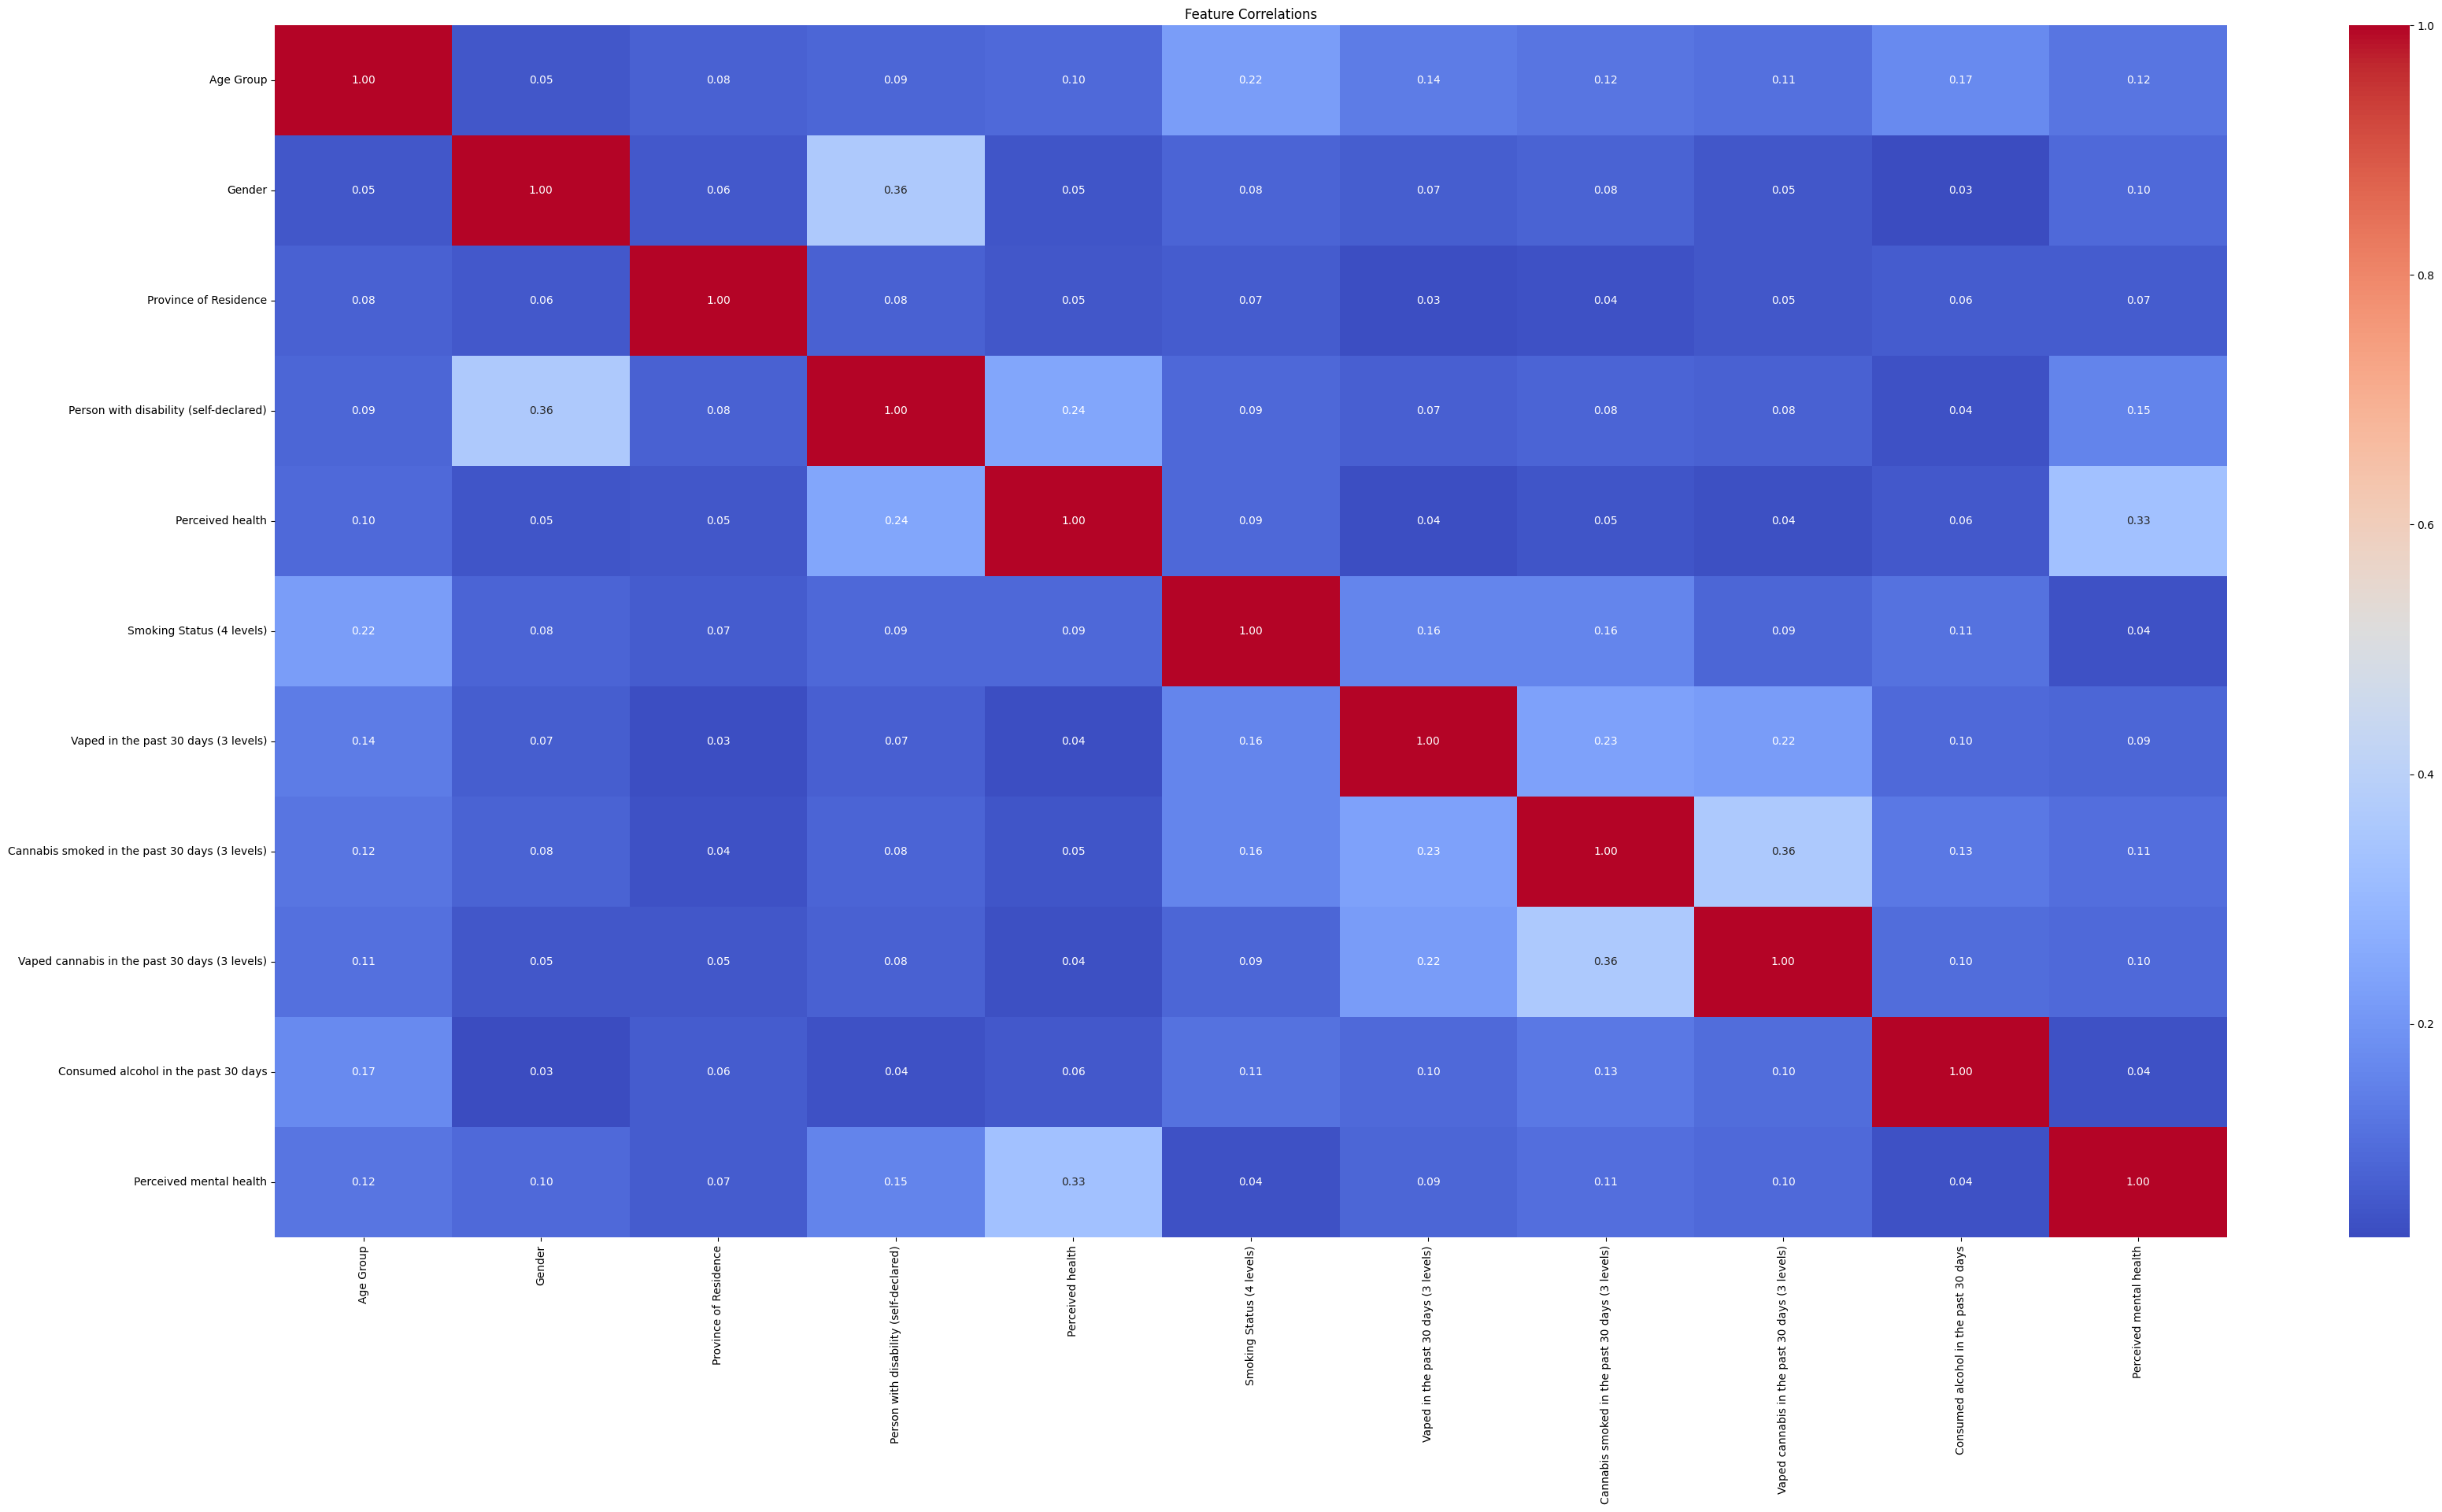

In [277]:
# Coorelation
# Convert categorical columns to numeric if necessary
data_numeric = data[clus_1_data.select_dtypes(include=["number"]).columns.to_list() + ["Perceived mental health"]]


cols = data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(data_numeric[cols[i]], data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [278]:
cv_data = pd.DataFrame(cv_arr, columns = cols, index = cols)
cv_data["Perceived mental health"]


Age Group                                         0.122811
Gender                                            0.095789
Province of Residence                             0.066225
Person with disability (self-declared)            0.154784
Perceived health                                  0.330090
Smoking Status (4 levels)                         0.040583
Vaped in the past 30 days (3 levels)              0.087025
Cannabis smoked in the past 30 days (3 levels)    0.107649
Vaped cannabis in the past 30 days (3 levels)     0.096628
Consumed alcohol in the past 30 days              0.040578
Perceived mental health                           1.000000
Name: Perceived mental health, dtype: float64

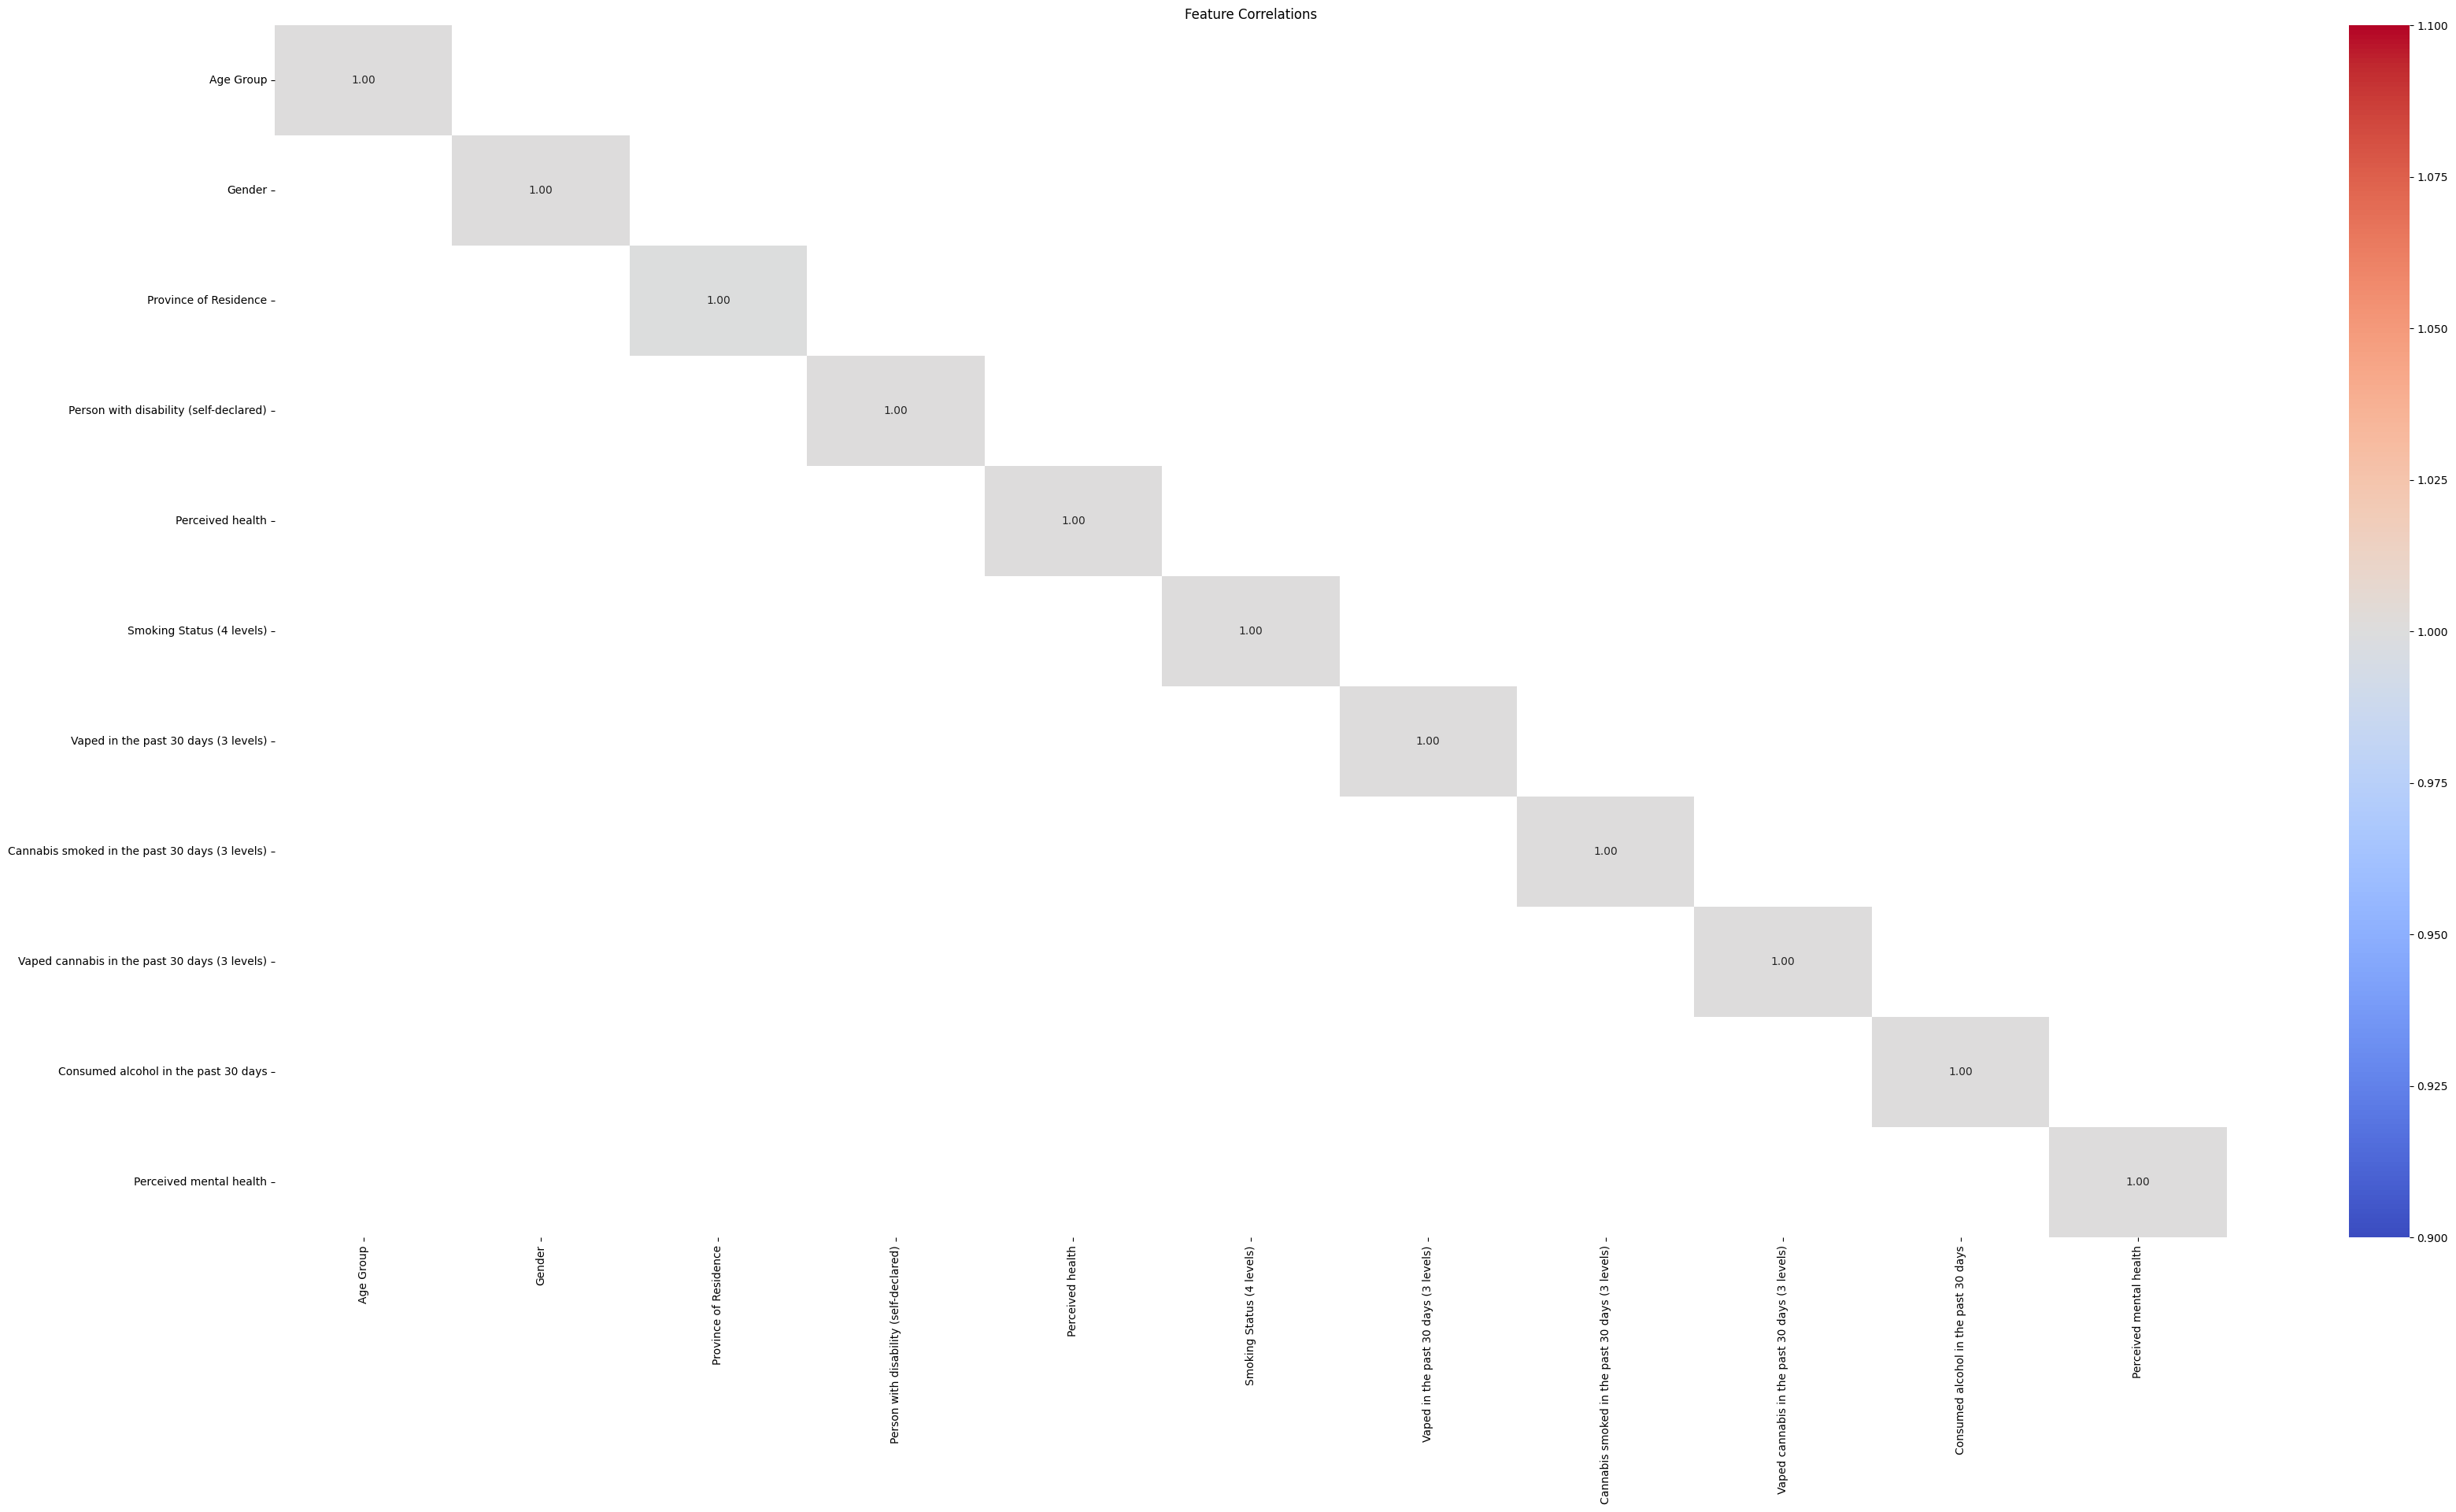

In [279]:
cv_data = cv_data[(cv_data > 0.5) | (cv_data < -0.5)]
plt.figure(figsize=(40, 20))
sns.heatmap(cv_data, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [280]:
# substance use status
clus_2_data=data[['Smoking Status (4 levels)','Vaped in the past 30 days (3 levels)','Cannabis smoked in the past 30 days (3 levels)','Vaped cannabis in the past 30 days (3 levels)','Consumed alcohol in the past 30 days']].copy()

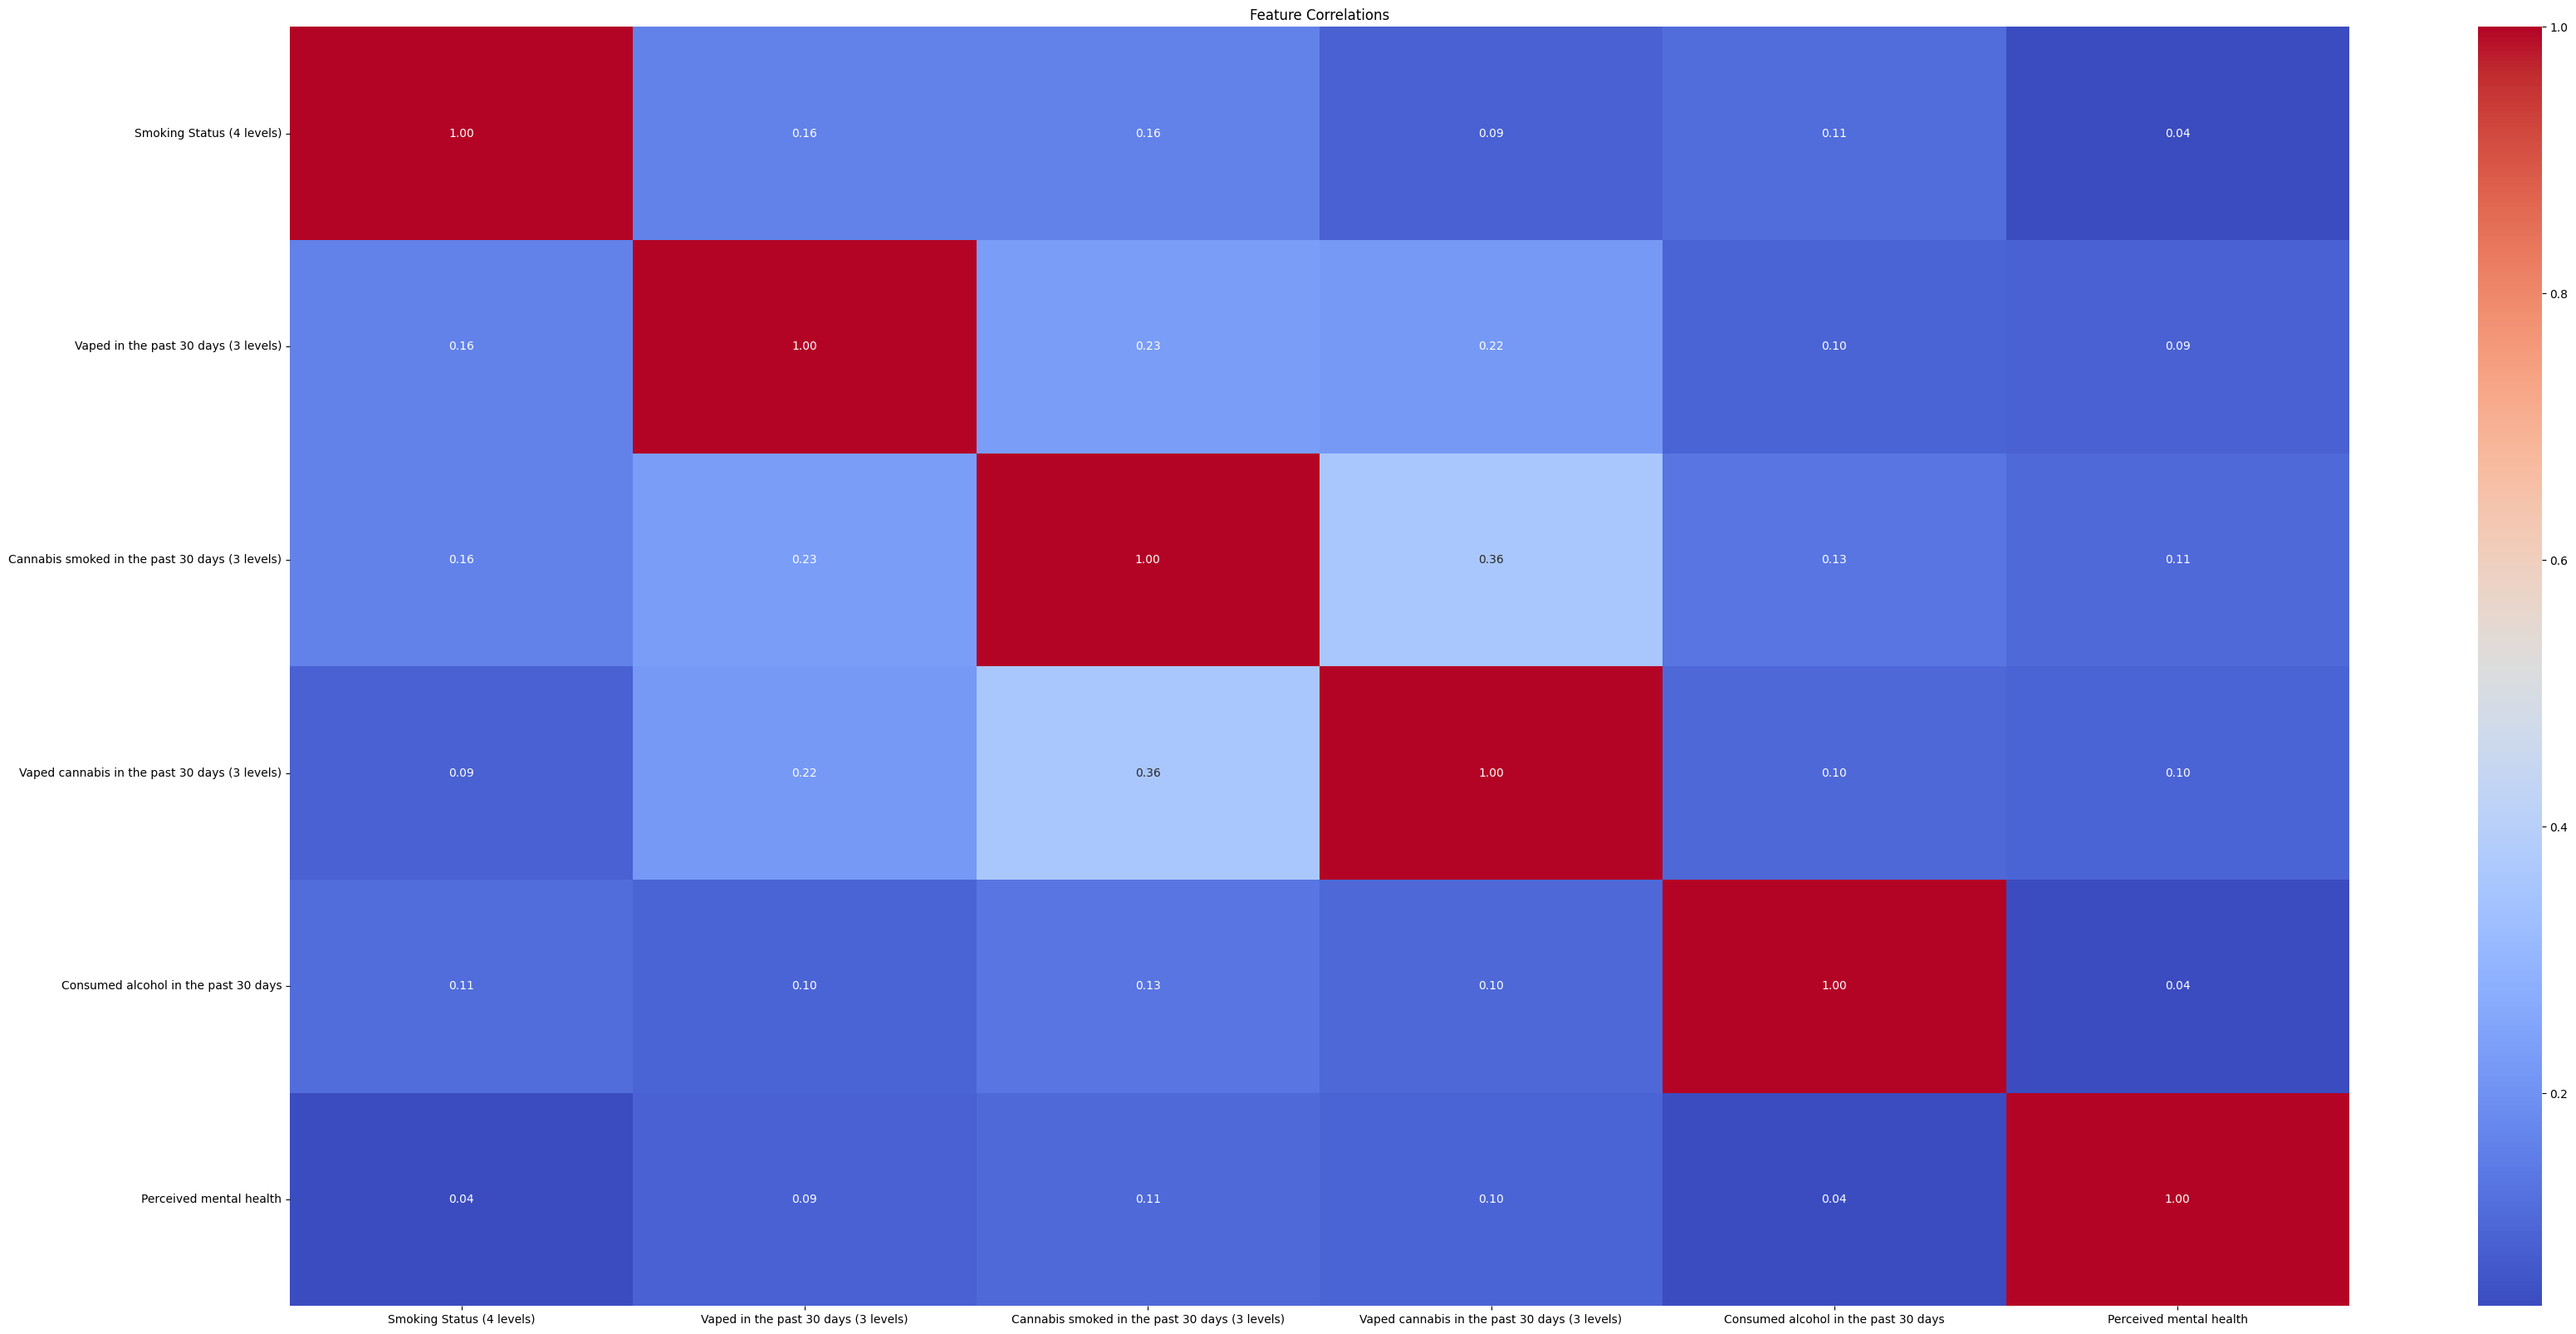

In [281]:
# Convert categorical columns to numeric if necessary
data_numeric = data[clus_2_data.select_dtypes(include=["number"]).columns.to_list() + ["Perceived mental health"]]

cols = data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(data_numeric[cols[i]], data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

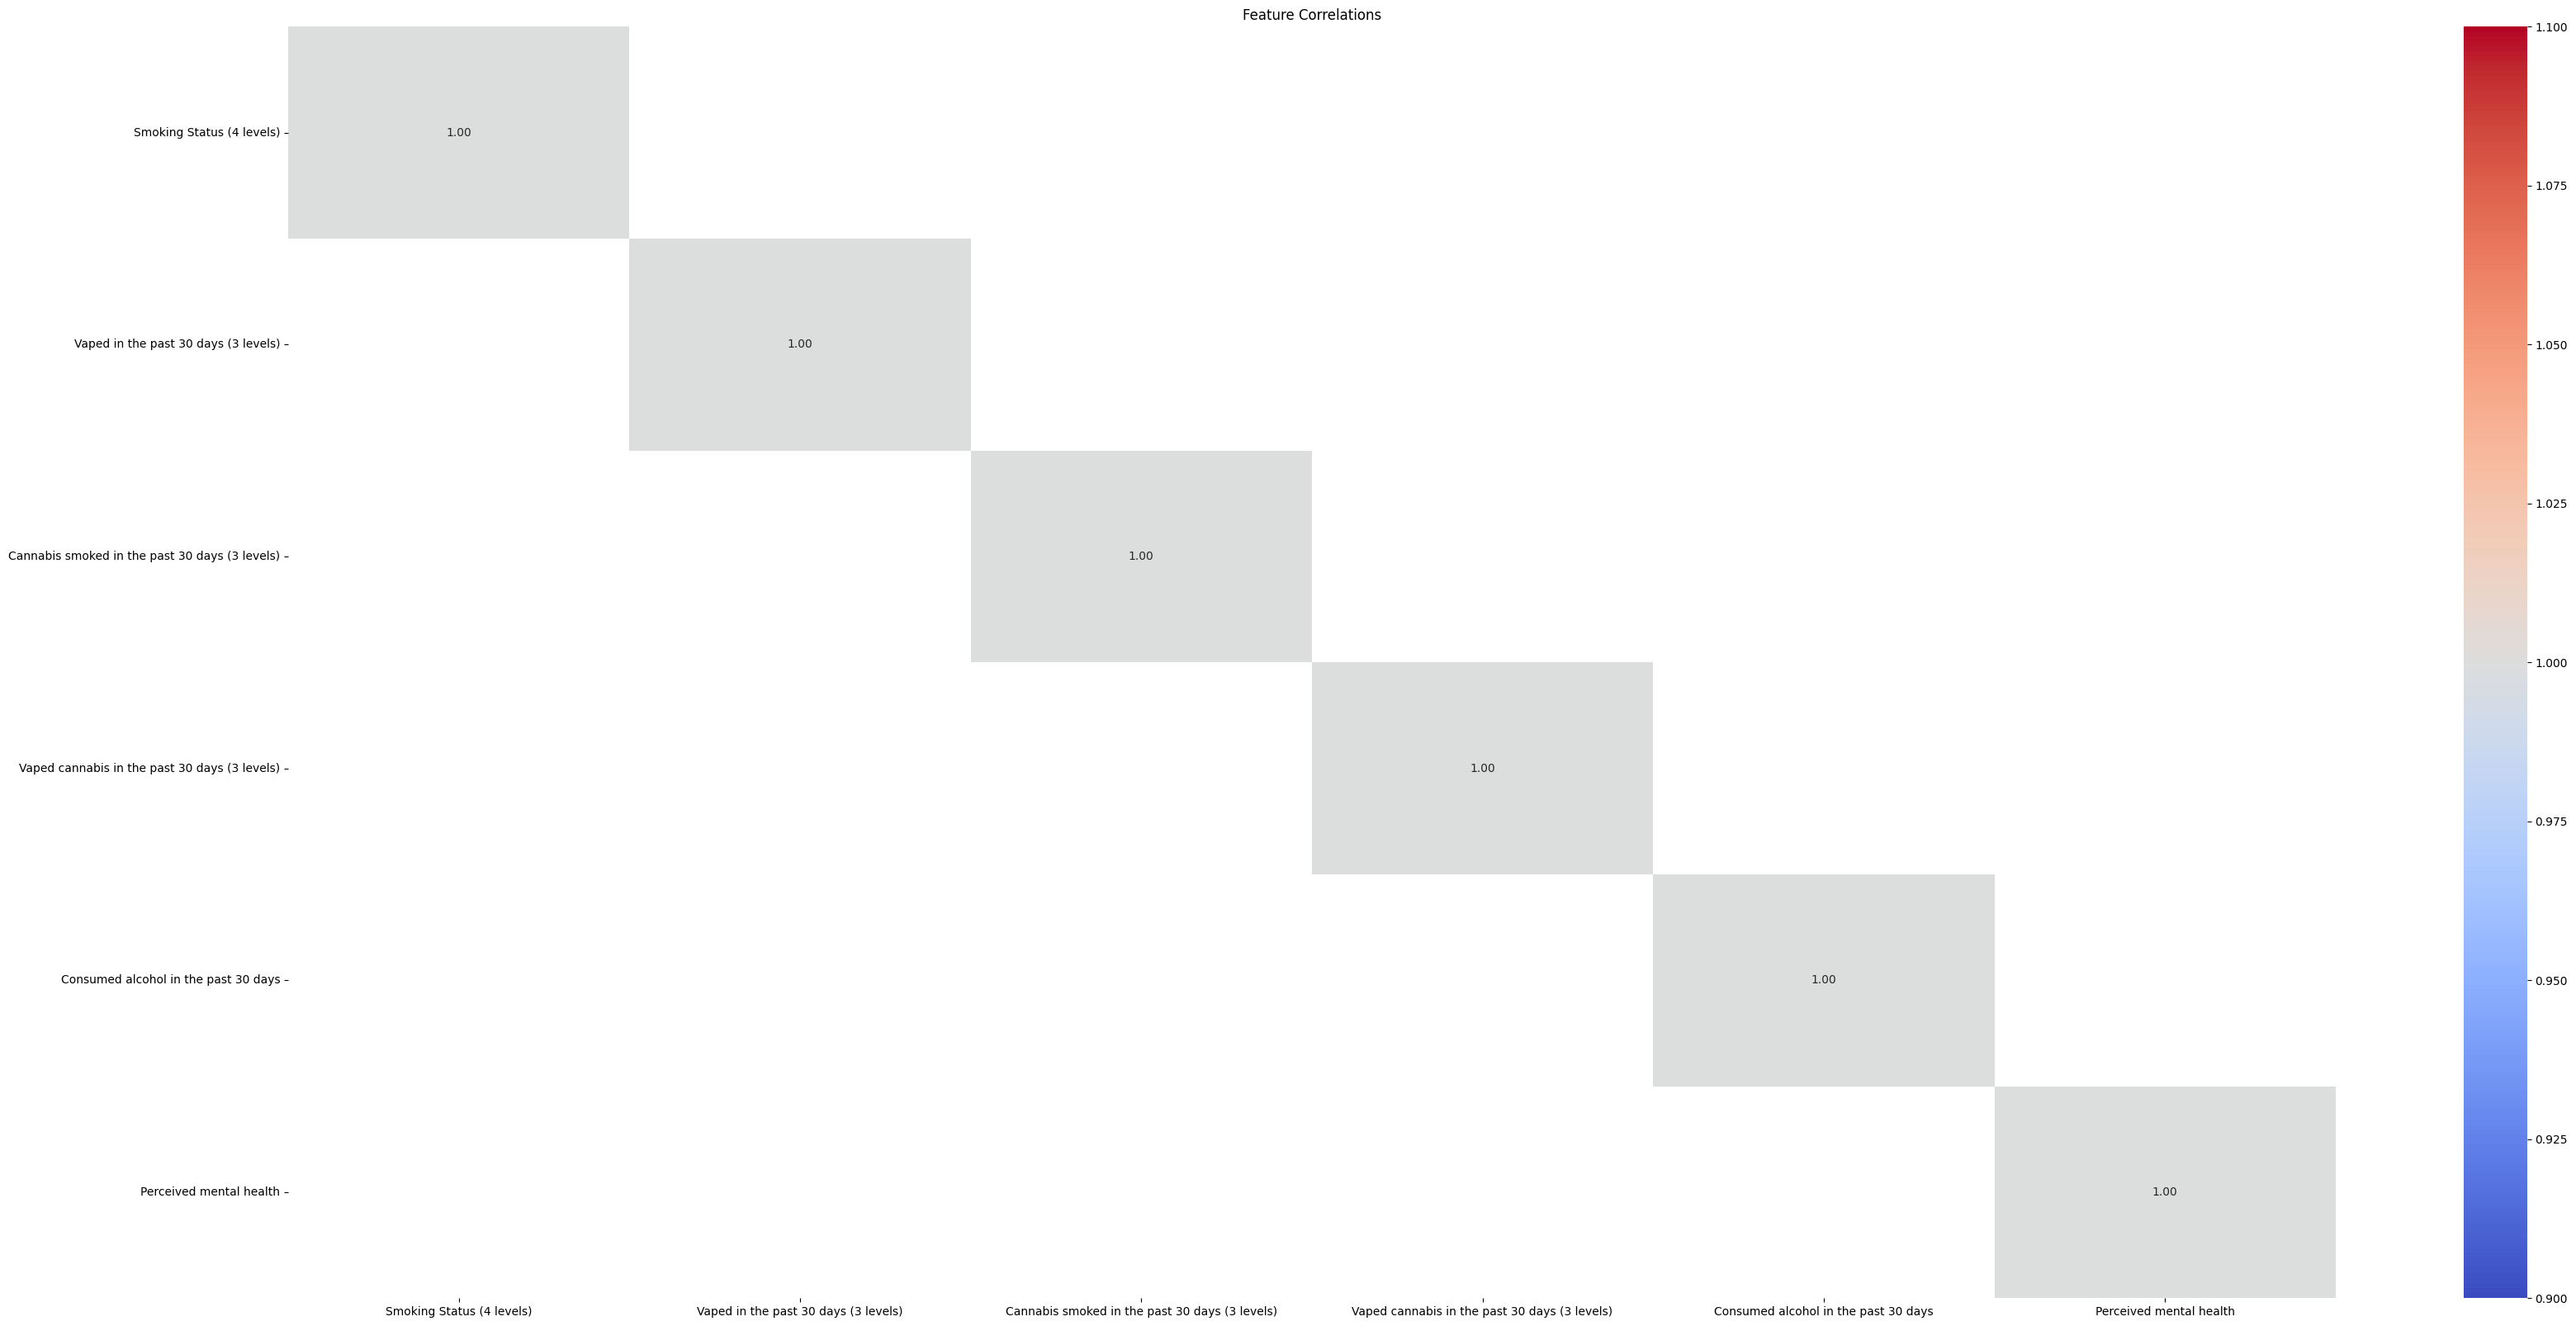

In [282]:
cv_data = pd.DataFrame(cv_arr, columns = cols, index = cols)
cv_data = cv_data[cv_data > 0.5]

plt.figure(figsize=(40, 20))
sns.heatmap(cv_data, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

# modeling

In [283]:
# Sklearn clustering models
# K means
# Affinity Propogation ---->Many clusters, uneven cluster size, non-flat geometry, inductive
# Mean shift--->Many clusters, uneven cluster size, non-flat geometry, inductive
# Spectral clustering
# Ward hierarchial 
# Agglomerative clustering
# DBSCAN
# HDBSCAN
# oPTICS
# GAUSIAN MIXTURES
# Birch
# Bisecting k-means
# Latent class analysis


In [284]:
# research upon clustering alogrithms

In [285]:
#  k MODES
# Hierarchial
# DBSCAN
# LCA

# KMODES

In [286]:
!pip install kmodes
from kmodes.kmodes import KModes


In [287]:
# Kmodes
# Variant of k-means clustering able to deal with categorical data
# KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means.
# But for categorical data points, we cannot calculate the distance. So we go for KModes algorithm. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

In [288]:
# Simple steps description of kmode algorithm
# Pick an observation (instance) at random and use that as a cluster
# Compare each data point in the cluster to each observation data points, any elements that are not equal we +1 if they are equal nothing is added.
# Assign each individual to the closest centroid.
# Repeat steps 2-4 until no more changes are made in the cluster assignment of individuals to the closest centroid.

# Finding the optimal k, or number of clusters

## Elbow Method and Silhoutte score

In [289]:
# Description
# Instead of minimizing variance like K-Means, K-Modes minimizes the cost function based on the number of mismatches between categorical variables.
# The Elbow Method helps identify the best K by plotting the cost function (sum of intra-cluster mismatches) for different cluster values.

In [290]:
# steps
# Run K-Modes for Different Values of K- Compute the clustering cost (sum of categorical mismatches) for various K values.
# Plot K vs. Cost- The cost decreases as K increases, but after a certain point, the decrease slows down.
# Find the Elbow point - The "elbow" is the point where adding more clusters does not significantly reduce the cost.This K value is chosen as the optimal number of clusters.

In [291]:
# upper bound of k 
n_data_points=len(data)
k_max= math.sqrt(n_data_points/2)
print(k_max)
# This is a high value ,as we can first try with range 1 to 20 and if there is still drastic change in cost we can try next range 20 to 40 and so on.

77.80745465570763


In [292]:
def elbow_method(n,data_):
    cost=[]
    K=range(1,n)

    for num_clusters in list(K):
        kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=0) # initialization Cao --> Efficient for categorical data, n_init=5: Runs the clustering algorithm 5 times with different initializations and picks the best result.
        kmode.fit_predict(clus_2_data)
        cost.append(kmode.cost_) # Stores the cost (sum of dissimilarities within clusters) for each K.
    return K,cost


def silhoutte_method(n,data_):
    score_values=[]
    K = range(2,n)
    best_score = -1 # silhoutte score starts from -1 to 1. -1 (poor clustering), 0 (data points on the border of clusters), 1(good clustering)
    for k in list(K):
        km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
        clusters = km.fit_predict(data_)  # Use categorical dataset
        score = silhouette_score(data_, clusters, metric='hamming')  # Hamming for categorical
        #print(f'{k} : {score}')
        score_values.append(score)
    return K, score_values

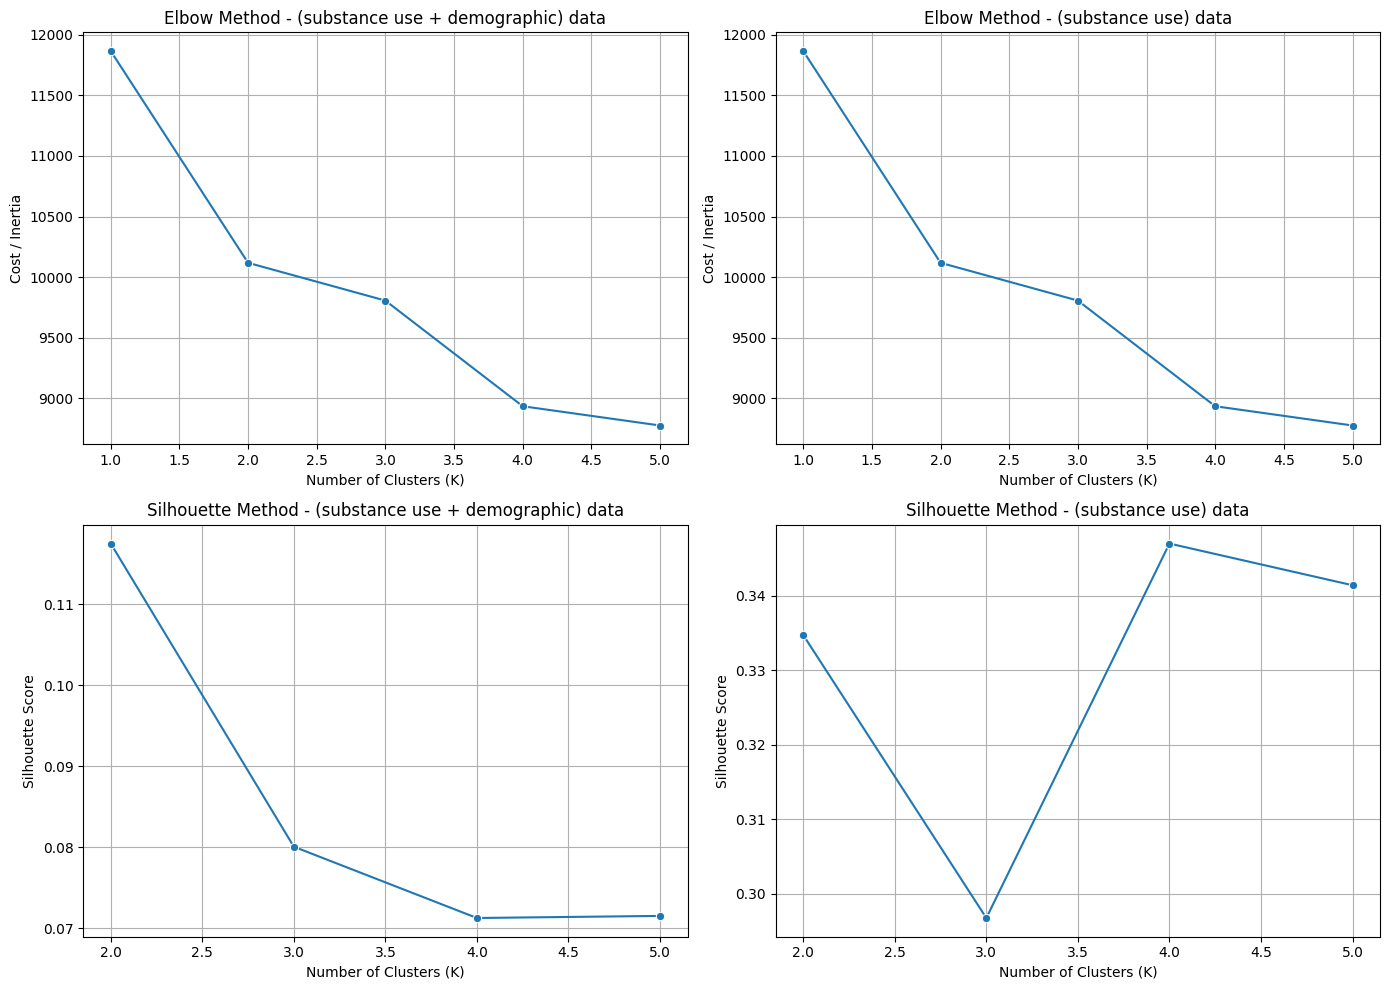

In [293]:
# Get Elbow method values
K1_elbow, cost1 = elbow_method(6, clus_1_data)
K2_elbow, cost2 = elbow_method(6, clus_2_data)

# Get Silhouette method values
K1_sil, score_values1 = silhoutte_method(6, clus_1_data)
K2_sil, score_values2 = silhoutte_method(6, clus_2_data)

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Elbow plot - clus_1_data
sns.lineplot(ax=axes[0, 0], x=K1_elbow, y=cost1, marker='o')
axes[0, 0].set_title("Elbow Method - (substance use + demographic) data")
axes[0, 0].set_xlabel("Number of Clusters (K)")
axes[0, 0].set_ylabel("Cost / Inertia")
axes[0, 0].grid(True)

# Elbow plot - clus_2_data
sns.lineplot(ax=axes[0, 1], x=K2_elbow, y=cost2, marker='o')
axes[0, 1].set_title("Elbow Method - (substance use) data")
axes[0, 1].set_xlabel("Number of Clusters (K)")
axes[0, 1].set_ylabel("Cost / Inertia")
axes[0, 1].grid(True)

# Silhouette plot - clus_1_data
sns.lineplot(ax=axes[1, 0], x=K1_sil, y=score_values1, marker='o')
axes[1, 0].set_title("Silhouette Method - (substance use + demographic) data")
axes[1, 0].set_xlabel("Number of Clusters (K)")
axes[1, 0].set_ylabel("Silhouette Score")
axes[1, 0].grid(True)

# Silhouette plot - clus_2_data
sns.lineplot(ax=axes[1, 1], x=K2_sil, y=score_values2, marker='o')
axes[1, 1].set_title("Silhouette Method - (substance use) data")
axes[1, 1].set_xlabel("Number of Clusters (K)")
axes[1, 1].set_ylabel("Silhouette Score")
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [294]:
# Lower cost means points are tightly grouped around cluster centers.
# Measures how similar a point is to its own cluster vs. other clusters.->Ranges from -1 to 1:->+1 = perfectly matched to its own cluster and far from others.,0 = on the boundary between clusters.,-1 = likely misclassified.

In [295]:
# optimal number of clusters for clus_2_data(substance use) is 4 according to the elbow method
# optimal number of clusters for clus_1_data(substance use + demographic) is 2 according to the elbow method

# KMODE MODELS

## Model 1 ( Substance Use)

In [296]:
# Fit K-Modes
#---------------------------------------------------------------------------------------------------------------------------------------------
# Substance use data (clus_2_data)
# n_clusters = 4
# resultant data-clus_2_data_kmode
#---------------------------------------------------------------------------------------------------------------------------------------------
km = KModes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = km.fit_predict(clus_2_data)
clus_2_data_kmode=clus_2_data.copy()
# Add cluster labels to the dataset
clus_2_data_kmode.loc[:, 'Cluster'] = clusters


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 767, cost: 8934.0
Run 1, iteration: 2/100, moves: 73, cost: 8934.0


### Cluster Analysis

In [297]:
# Cluster size
# The majority class is class 0
clus_2_data_kmode['Cluster'].value_counts()

Cluster
0    10534
1      744
3      518
2      312
Name: count, dtype: int64

In [298]:
clus_summary = clus_2_data_kmode.groupby('Cluster').agg(lambda x: x.value_counts().index[0])
print(clus_summary)



         Smoking Status (4 levels)  Vaped in the past 30 days (3 levels)  \
Cluster                                                                    
0                                4                                     3   
1                                3                                     3   
2                                1                                     3   
3                                4                                     3   

         Cannabis smoked in the past 30 days (3 levels)  \
Cluster                                                   
0                                                     3   
1                                                     3   
2                                                     3   
3                                                     2   

         Vaped cannabis in the past 30 days (3 levels)  \
Cluster                                                  
0                                                    3   
1             

In [299]:
# Create a new DataFrame to hold mode + percentage
mode_percentages = pd.DataFrame(index=clus_summary.index, columns=clus_summary.columns)

# Loop through each cluster
for cluster_id, group_data in clus_2_data_kmode.groupby('Cluster'):
    for column in group_data.columns:
        if column == 'Cluster':
            continue  # skip the Cluster column itself
        mode_value = group_data[column].mode()[0]
        mode_count = (group_data[column] == mode_value).sum()
        percentage = (mode_count / len(group_data)) * 100
        mode_percentages.loc[cluster_id, column] = f"{mode_value} ({percentage:.1f}%)"

# Show the result
print(mode_percentages)

        Smoking Status (4 levels) Vaped in the past 30 days (3 levels)  \
Cluster                                                                  
0                       4 (79.0%)                            3 (93.0%)   
1                       3 (92.6%)                            3 (91.7%)   
2                      1 (100.0%)                            3 (86.5%)   
3                       4 (61.8%)                            3 (48.1%)   

        Cannabis smoked in the past 30 days (3 levels)  \
Cluster                                                  
0                                            3 (92.5%)   
1                                            3 (88.6%)   
2                                            3 (80.4%)   
3                                            2 (75.9%)   

        Vaped cannabis in the past 30 days (3 levels)  \
Cluster                                                 
0                                           3 (98.0%)   
1                                  

In [300]:
# maybe use this one for mca
for i in range(0,len(clus_summary)):
    for column in clus_summary.columns:
        if clus_summary.iloc[i-1][column]!=clus_summary.iloc[i][column]:
            print(f"cluster{i}:{column}:{clus_summary.iloc[i][column]}")

cluster0:Cannabis smoked in the past 30 days (3 levels):3
cluster0:Vaped cannabis in the past 30 days (3 levels):3
cluster1:Smoking Status (4 levels):3
cluster1:Consumed alcohol in the past 30 days:2
cluster2:Smoking Status (4 levels):1
cluster3:Smoking Status (4 levels):4
cluster3:Cannabis smoked in the past 30 days (3 levels):2
cluster3:Vaped cannabis in the past 30 days (3 levels):2
cluster3:Consumed alcohol in the past 30 days:1


In [301]:
clus_2_data_kmode[["Smoking Status (4 levels)","Consumed alcohol in the past 30 days","Cannabis smoked in the past 30 days (3 levels)"]]

Smoking Status (4 levels)  Consumed alcohol in the past 30 days  \
0                              4                                     1   
1                              4                                     1   
2                              4                                     1   
3                              4                                     1   
4                              4                                     1   
...                          ...                                   ...   
12128                          4                                     1   
12129                          3                                     1   
12130                          3                                     1   
12131                          1                                     2   
12132                          4                                     1   

       Cannabis smoked in the past 30 days (3 levels)  
0                                                   3  
1                                                   2  
2                                                   3  
3                                                   3  
4                                                   3  
...                                               ...  
12128                                               3  
12129                                               3  
12130                                               1  
12131                                               3  
12132                                               3  

[12108 rows x 3 columns]

### Cluster Representation

In [302]:
# Apply MCA to the clustered data
mca = MCA(n_components=3, random_state=42)

# Perform MCA to reduce dimensions
clus_2_data_kmode['MCA1'], clus_2_data_kmode['MCA2'], clus_2_data_kmode['MCA3']= mca.fit_transform(clus_2_data_kmode.drop(columns='Cluster')).iloc[:, 0], mca.fit_transform(clus_2_data_kmode.drop(columns='Cluster')).iloc[:, 1], mca.fit_transform(clus_2_data_kmode.drop(columns='Cluster')).iloc[:, 2]

# Plot the clusters after MCA
fig = px.scatter_3d(data_frame = clus_2_data_kmode, x='MCA1', y='MCA2', z='MCA3',
              color='Cluster')
fig.show()

### Descriptive Analysis of clusters

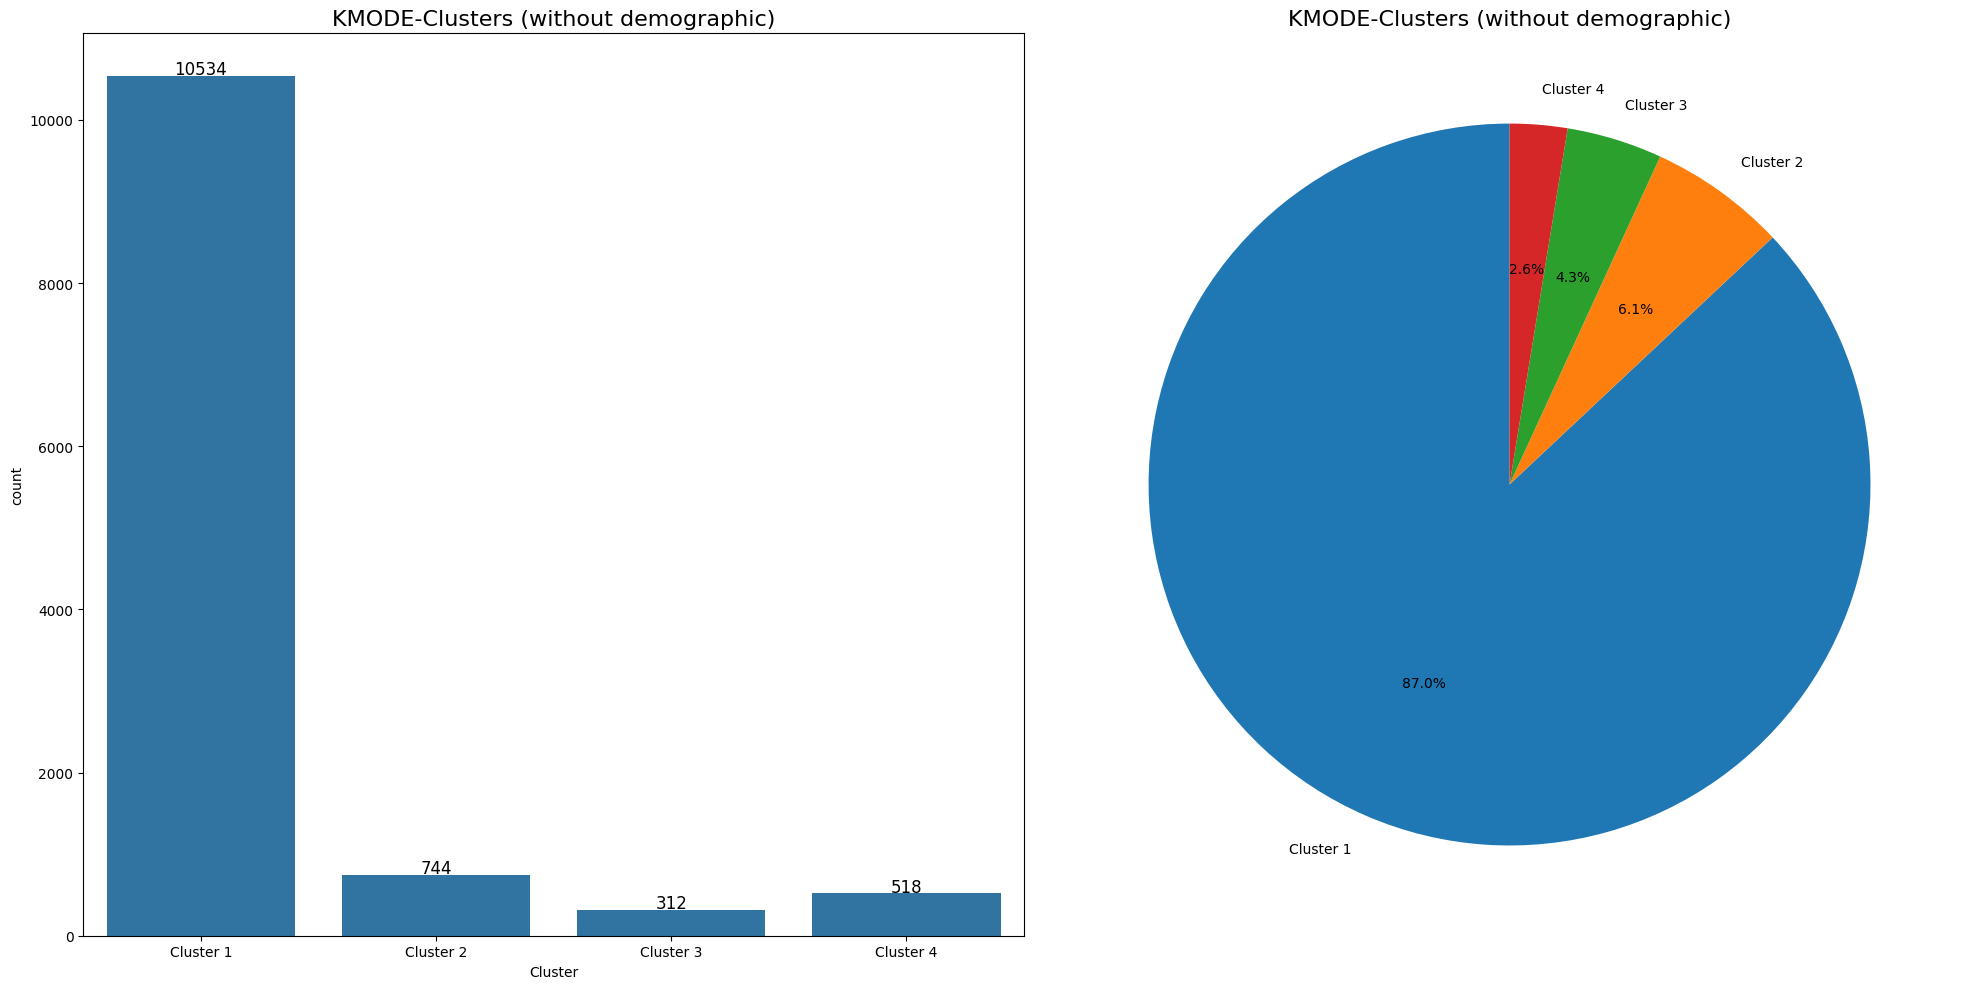

In [303]:
# Respondents (indigeneous flag)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Cluster", data=clus_2_data_kmode.drop(["MCA1","MCA2","MCA3"],axis=1))

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1,2,3]) 
ax.set_xticklabels(["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]) 
plt.title('KMODE-Clusters (without demographic)', fontsize=16)

plt.subplot(1,2,2)
clus_counts = clus_2_data_kmode["Cluster"].value_counts()
# Plot the pie chart
plt.pie(clus_counts, labels=["Cluster 1","Cluster 2","Cluster 3","Cluster 4"], autopct='%1.1f%%',startangle=90)
plt.title('KMODE-Clusters (without demographic)', fontsize=16)


plt.tight_layout()
plt.show()

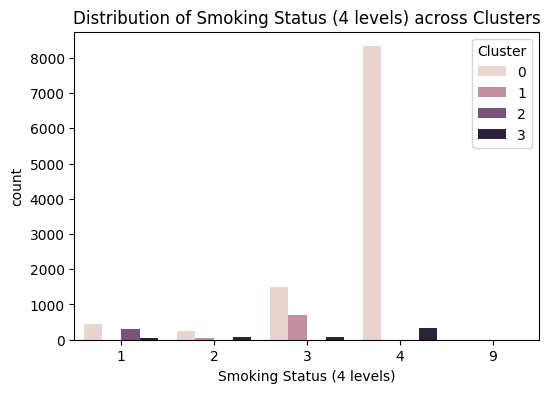

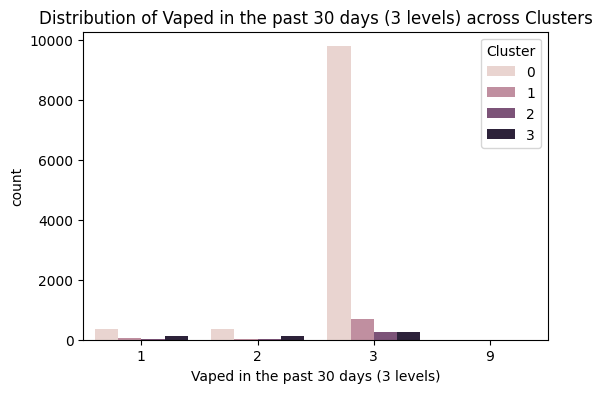

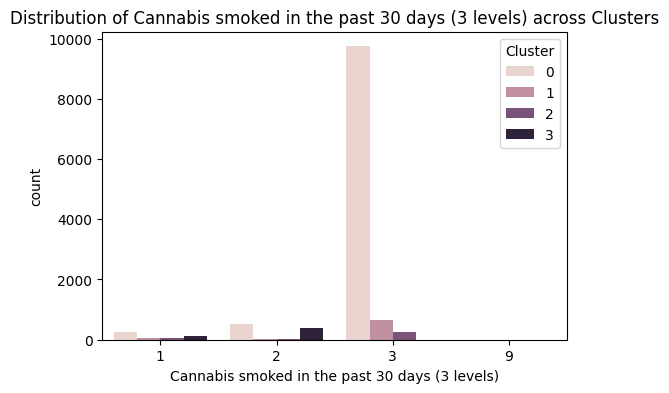

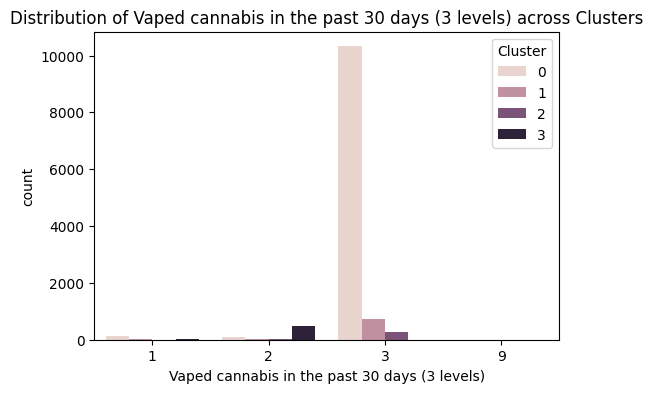

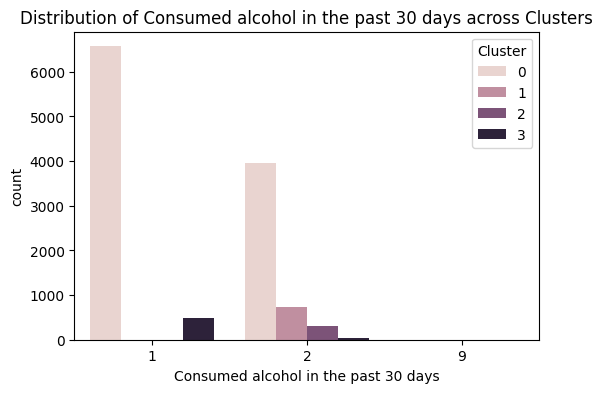

In [304]:
for col in clus_2_data_kmode.drop(["MCA1", "MCA2", "MCA3"], axis=1).columns[:-1]:  # Exclude 'Cluster' column
    plt.figure(figsize=(6,4))
    sns.countplot(data=clus_2_data_kmode.drop(["MCA1", "MCA2", "MCA3"], axis=1), x=col, hue='Cluster')
    plt.title(f"Distribution of {col} across Clusters")
    plt.show()


In [305]:
from scipy.stats import chi2_contingency
for col in clus_2_data_kmode.drop(["MCA1", "MCA2", "MCA3"], axis=1).columns[:-1]:  # Exclude 'Cluster'
    contingency_table = pd.crosstab(clus_2_data_kmode.drop(["MCA1", "MCA2", "MCA3"], axis=1)[col], clus_2_data_kmode.drop(["MCA1", "MCA2", "MCA3"], axis=1)['Cluster'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {col} - Chi-Square: {chi2:.2f}, P-value: {p:.4f}")


Feature: Smoking Status (4 levels) - Chi-Square: 7664.19, P-value: 0.0000
Feature: Vaped in the past 30 days (3 levels) - Chi-Square: 1220.14, P-value: 0.0000
Feature: Cannabis smoked in the past 30 days (3 levels) - Chi-Square: 4239.73, P-value: 0.0000
Feature: Vaped cannabis in the past 30 days (3 levels) - Chi-Square: 8951.09, P-value: 0.0000
Feature: Consumed alcohol in the past 30 days - Chi-Square: 1819.04, P-value: 0.0000


### Association

In [306]:
contingency_table = pd.crosstab(clus_2_data_kmode['Cluster'], data["Perceived mental health"])
print(contingency_table)


Perceived mental health     1     2     3     4    5
Cluster                                             
0                        2371  3312  3086  1372  393
1                         144   227   245   107   21
2                          72    95    95    35   15
3                          39   113   160   147   59


In [307]:
# Compute the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between clusters and mental health.")
else:
    print("No significant association found.")

# no significant association when substance use pattern taken alone(without demographic variables)

Chi-Square Statistic: 233.2648319342576
P-value: 4.177902974657751e-43
There is a significant association between clusters and mental health.


In [308]:
# Your variables here: replace with your actual DataFrame columns
cramers_v_score = cramers_v(clus_2_data_kmode['Cluster'], data['Perceived mental health'])
print(f"Cramér's V: {cramers_v_score:.4f}")

Cramér's V: 0.0801


## Conclusion (Substance use alone)

Chi-Square Statistic: The large value of 233.26 suggests a noticeable difference between the observed and expected frequencies when we compare clusters (based on substance use patterns) with perceived mental health.

P-value: The extremely small p-value of 4.18e-43 indicates that the relationship between clusters (based on substance use) and perceived mental health is statistically significant. This means the observed association is highly unlikely to have occurred by chance.

Cramér’s V: The Cramér’s V of 0.0801 shows a weak association between the substance use patterns (clusters) and perceived mental health. While the relationship is statistically significant, its strength is not very high.

While substance use patterns do show a statistically significant association with perceived mental health, the strength of this association is weak. This means that, substance use alone has a noticeable but not particularly strong impact on perceived mental health.

# Model 2 (substance use + demographic features)

In [309]:
# Fit K-Modes
#---------------------------------------------------------------------------------------------------------------------------------------------
# Substance use data (clus_1_data)
# n_clusters = 2
# resultant data-clus_1_data_kmode
#---------------------------------------------------------------------------------------------------------------------------------------------
# Fit K-Modes
km = KModes(n_clusters=2, init='Cao', n_init=5, verbose=1)
clusters = km.fit_predict(clus_1_data)

clus_1_data_kmode=clus_1_data.copy()

# Add cluster labels to the dataset
clus_1_data_kmode['Cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1560, cost: 40241.0


### Cluster Analysis

In [310]:
clus_1_data_kmode['Cluster'].value_counts()

Cluster
0    9203
1    2905
Name: count, dtype: int64

In [311]:
clus_summary = clus_1_data_kmode.groupby('Cluster').agg(lambda x: x.value_counts().index[0])
print(clus_summary)

         Age Group  Gender  Province of Residence  \
Cluster                                             
0                1       2                     35   
1                7       1                     24   

         Person with disability (self-declared)  Perceived health  \
Cluster                                                             
0                                             2                 2   
1                                             2                 3   

         Smoking Status (4 levels)  Vaped in the past 30 days (3 levels)  \
Cluster                                                                    
0                                4                                     3   
1                                3                                     3   

         Cannabis smoked in the past 30 days (3 levels)  \
Cluster                                                   
0                                                     3   
1                           

In [312]:
# Create a new DataFrame to hold mode + percentage
mode_percentages = pd.DataFrame(index=clus_summary.index, columns=clus_summary.columns)

# Loop through each cluster
for cluster_id, group_data in clus_1_data_kmode.groupby('Cluster'):
    for column in group_data.columns:
        if column == 'Cluster':
            continue  # skip the Cluster column itself
        mode_value = group_data[column].mode()[0]
        mode_count = (group_data[column] == mode_value).sum()
        percentage = (mode_count / len(group_data)) * 100
        mode_percentages.loc[cluster_id, column] = f"{mode_value} ({percentage:.1f}%)"

# Show the result
print(mode_percentages)

         Age Group     Gender Province of Residence  \
Cluster                                               
0        1 (25.6%)  2 (61.9%)            35 (27.5%)   
1        7 (43.0%)  1 (76.9%)            24 (28.5%)   

        Person with disability (self-declared) Perceived health  \
Cluster                                                           
0                                    2 (89.1%)        2 (44.0%)   
1                                    2 (83.4%)        3 (54.2%)   

        Smoking Status (4 levels) Vaped in the past 30 days (3 levels)  \
Cluster                                                                  
0                       4 (81.3%)                            3 (90.4%)   
1                       3 (44.7%)                            3 (92.3%)   

        Cannabis smoked in the past 30 days (3 levels)  \
Cluster                                                  
0                                            3 (87.6%)   
1                                      

In [313]:
for i in range(0,len(clus_summary)):
    for column in clus_summary.columns:
        if clus_summary.iloc[i-1][column]!=clus_summary.iloc[i][column]:
            print(f"cluster{i}:{column}:{clus_summary.iloc[i][column]}")

#cluster 0 -15 to 19 years old,Ontario,Very good, Never smoked, Valid skip, consumed alcohol :yes
#cluster 1- 65 years old and older, Quebec, Good, Former Smoker, First tried cigarette, consumed alcohol:no

cluster0:Age Group:1
cluster0:Gender:2
cluster0:Province of Residence:35
cluster0:Perceived health:2
cluster0:Smoking Status (4 levels):4
cluster0:Consumed alcohol in the past 30 days:1
cluster1:Age Group:7
cluster1:Gender:1
cluster1:Province of Residence:24
cluster1:Perceived health:3
cluster1:Smoking Status (4 levels):3
cluster1:Consumed alcohol in the past 30 days:2


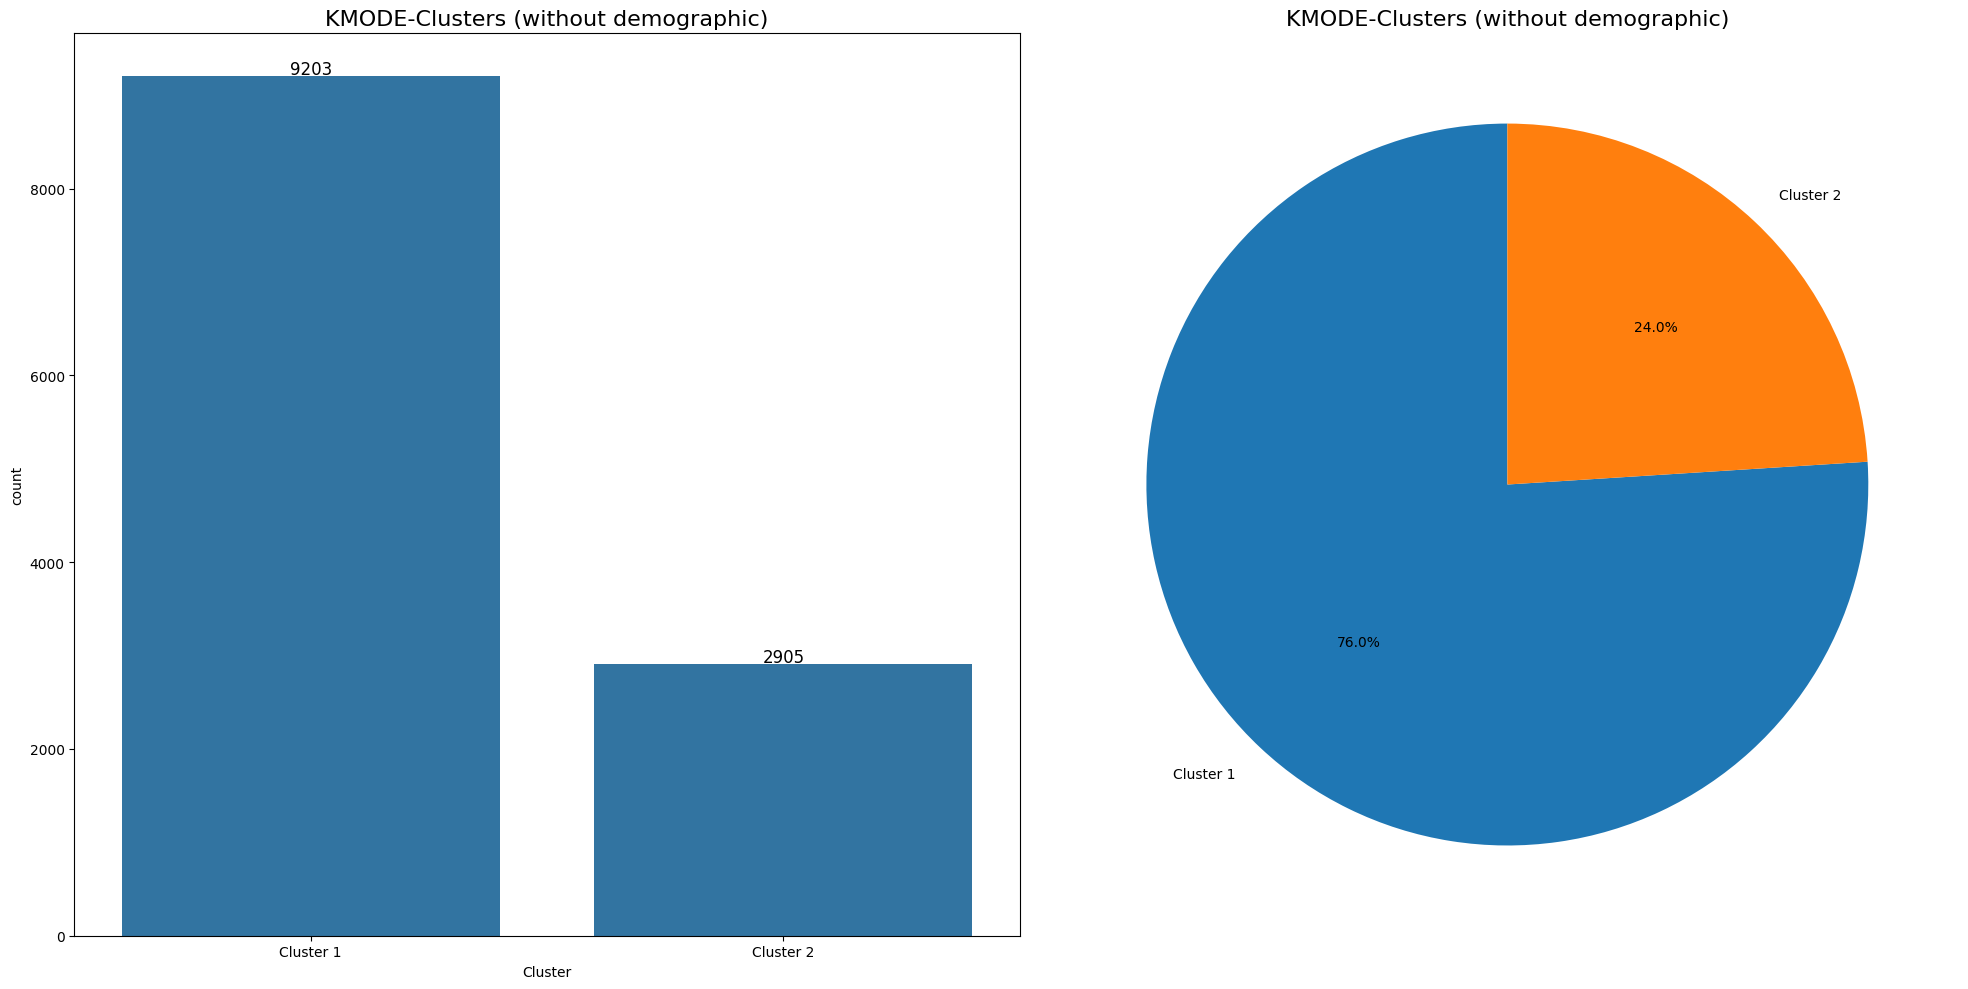

In [314]:
# Respondents (indigeneous flag)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Cluster", data=clus_1_data_kmode)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1]) 
ax.set_xticklabels(["Cluster 1","Cluster 2"]) 
plt.title('KMODE-Clusters (without demographic)', fontsize=16)

plt.subplot(1,2,2)
clus_counts = clus_1_data_kmode["Cluster"].value_counts()
# Plot the pie chart
plt.pie(clus_counts, labels=["Cluster 1","Cluster 2"], autopct='%1.1f%%',startangle=90)
plt.title('KMODE-Clusters (without demographic)', fontsize=16)


plt.tight_layout()
plt.show()

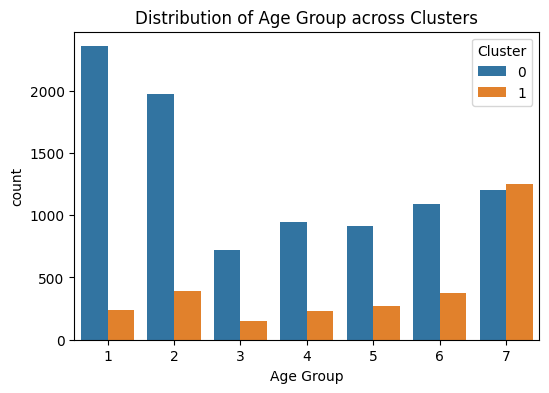

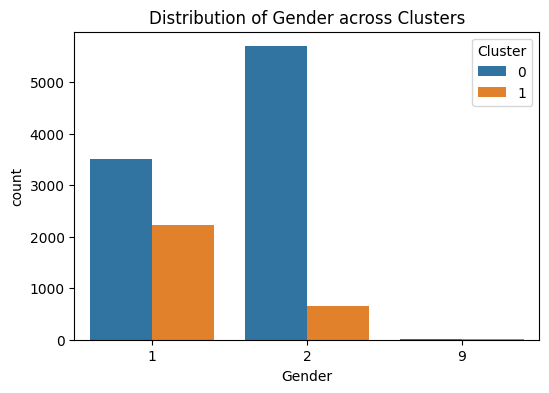

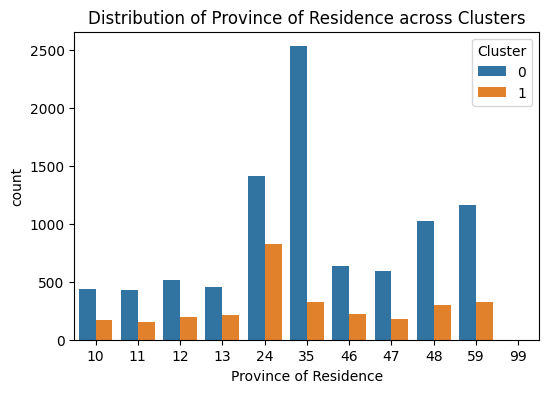

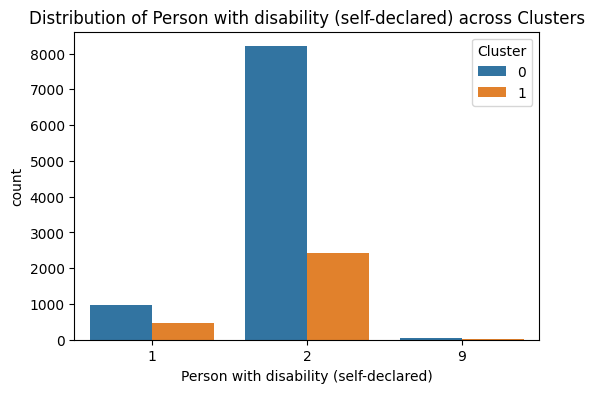

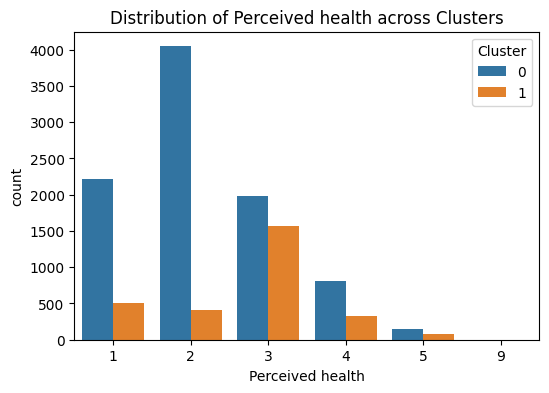

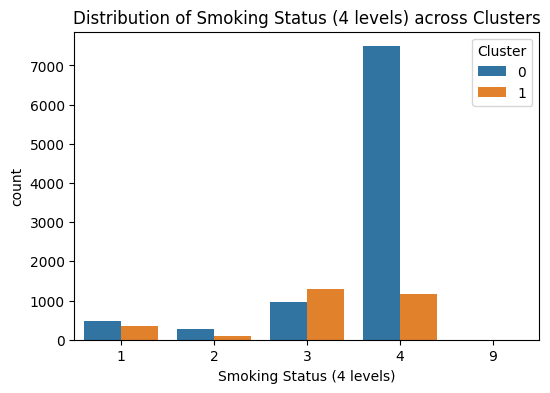

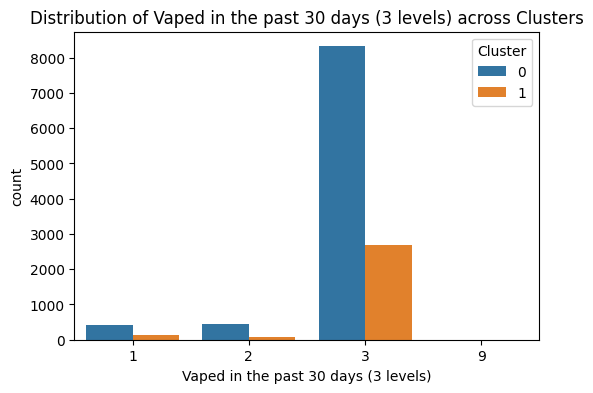

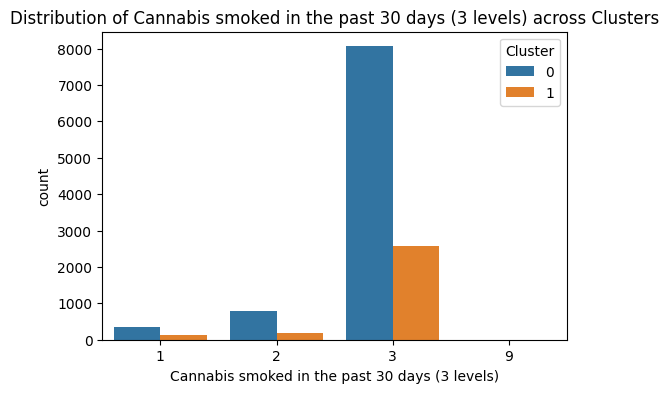

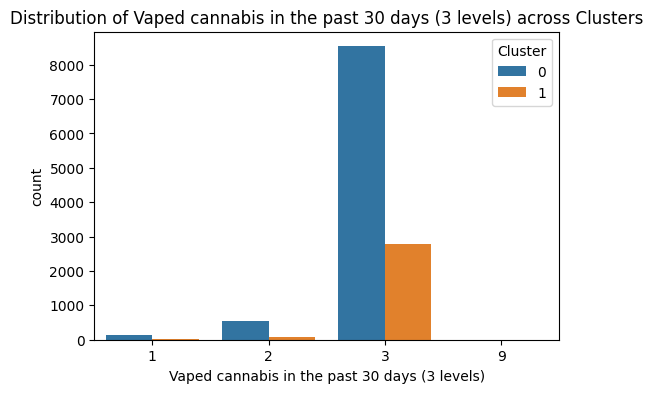

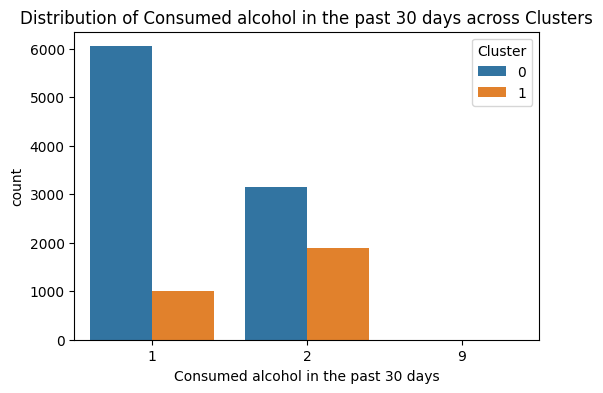

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in clus_1_data_kmode.columns[:-1]:  # Exclude 'Cluster' column
    plt.figure(figsize=(6,4))
    sns.countplot(data=clus_1_data_kmode, x=col, hue='Cluster')
    plt.title(f"Distribution of {col} across Clusters")
    plt.show()

In [316]:
# Apply MCA to the clustered data
mca = MCA(n_components=3, random_state=42)

# Perform MCA to reduce dimensions
clus_1_data_kmode['MCA1'], clus_1_data_kmode['MCA2'], clus_1_data_kmode['MCA3']= mca.fit_transform(clus_1_data_kmode.drop(columns='Cluster')).iloc[:, 0], mca.fit_transform(clus_1_data_kmode.drop(columns='Cluster')).iloc[:, 1], mca.fit_transform(clus_1_data_kmode.drop(columns='Cluster')).iloc[:, 2]

# Plot the clusters after MCA
fig = px.scatter_3d(data_frame = clus_1_data_kmode, x='MCA1', y='MCA2', z='MCA3',
              color='Cluster')
fig.show()

# Apply MCA to the clustered data
mca = MCA(n_components=2, random_state=42)

# Perform MCA to reduce dimensions
clus_1_data_kmode['MCA1'], clus_1_data_kmode['MCA2'] = mca.fit_transform(clus_1_data_kmode.drop(columns='Cluster')).iloc[:, 0], mca.fit_transform(clus_1_data_kmode.drop(columns='Cluster')).iloc[:, 1]

# Plot the clusters after MCA (2D plot)
fig = px.scatter(data_frame=clus_1_data_kmode, x='MCA1', y='MCA2', color='Cluster',
                 title="2D MCA Plot of Clusters", labels={'MCA1': 'MCA Component 1', 'MCA2': 'MCA Component 2'})
fig.show()


### Association Testing

In [317]:
# Contigency table with respective of mental health
contingency_table = pd.crosstab(clus_1_data_kmode['Cluster'], data["Perceived mental health"])
print(contingency_table)


Perceived mental health     1     2     3     4    5
Cluster                                             
0                        1904  2967  2595  1331  406
1                         722   780   991   330   82


In [318]:
# Compute the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between clusters and mental health.")
else:
    print("No significant association found.")

Chi-Square Statistic: 93.80484331520209
P-value: 2.0459478305733787e-19
There is a significant association between clusters and mental health.


In [319]:
percent_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print(percent_table.round(1))


Perceived mental health     1     2     3     4    5
Cluster                                             
0                        20.7  32.2  28.2  14.5  4.4
1                        24.9  26.9  34.1  11.4  2.8


In [320]:
# Your variables here: replace with your actual DataFrame columns
cramers_v_score = cramers_v(clus_1_data_kmode['Cluster'], data['Perceived mental health'])
print(f"Cramér's V: {cramers_v_score:.4f}")

Cramér's V: 0.0880


## Conclusion

Chi-Square Statistic: The large value of 93.80 indicates a meaningful difference between the observed and expected frequencies when comparing clusters (based on substance use and demographic variables) with perceived mental health.

P-value: The extremely small p-value of 2.05e-19 confirms that the relationship between these clusters and perceived mental health is statistically significant. This means the observed association is highly unlikely to have occurred by chance.

Cramér’s V: The Cramér’s V of 0.0880 indicates a weak association between the clusters and perceived mental health. Although the relationship is statistically significant, the strength of the association remains low.

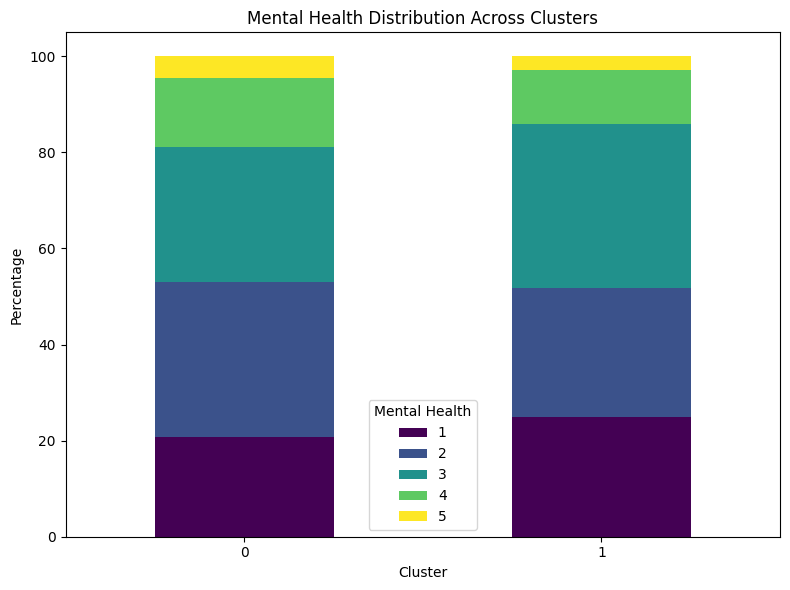

In [321]:
percent_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Mental Health Distribution Across Clusters")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title="Mental Health")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Bayesian Gaussian Mixture

The Bayesian Gaussian Mixture model is an extension of the Gaussian Mixture Model (GMM) that incorporates Bayesian principles to determine the number of clusters more flexibly. It assumes data is generated from a mixture of several Gaussian distributions, and it automatically adjusts the complexity of the model using priors, making it robust for clustering.
While BGM is primarily for continuous data, I used it as an exploratory tool after encoding the categorical variables. It helped assess whether a probabilistic approach could reveal meaningful latent patterns, complementing my K-Modes analysis.

## Determine the ideal number of classes

## BIC and Silhouette Score

In [322]:
def compute_bic(model, data):
    """
    Manually calculates the Bayesian Information Criterion (BIC)
    for a given BayesianGaussianMixture model and dataset.
    
    Parameters:
    - model: fitted BayesianGaussianMixture model
    - data: input data used for fitting the model

    Returns:
    - BIC score (float)
    """
    log_likelihood = model.score_samples(data).sum()
    n_components = model.n_components
    n_features = data.shape[1]
    
    # For each component: 1 weight, n_features means, and diagonal covariances
    n_params = n_components * (1 + n_features + n_features)  # weight + mean + variance

    bic = -2 * log_likelihood + n_params * np.log(data.shape[0])
    return bic


def BGMselection(data, max_clusters=10):
    bic_scores = []
    silhouette_scores = []

    for n_clusters in range(1, max_clusters + 1):
        model = BayesianGaussianMixture(n_components=n_clusters, covariance_type='diag', random_state=42)
        model.fit(data)

        bic = compute_bic(model, data)
        bic_scores.append(bic)

        if n_clusters > 1:
            cluster_labels = model.predict(data)
            silhouette_scores.append(silhouette_score(data, cluster_labels))
        else:
            silhouette_scores.append(None)

    results = pd.DataFrame({
        'Clusters': list(range(1, max_clusters + 1)),
        'BIC': bic_scores,
        'Silhouette': silhouette_scores
    })

    return results

In [323]:
# Run for both datasets
BGM_results_1 = BGMselection(clus_1_data, max_clusters=6)
BGM_results_2 = BGMselection(clus_2_data, max_clusters=6)

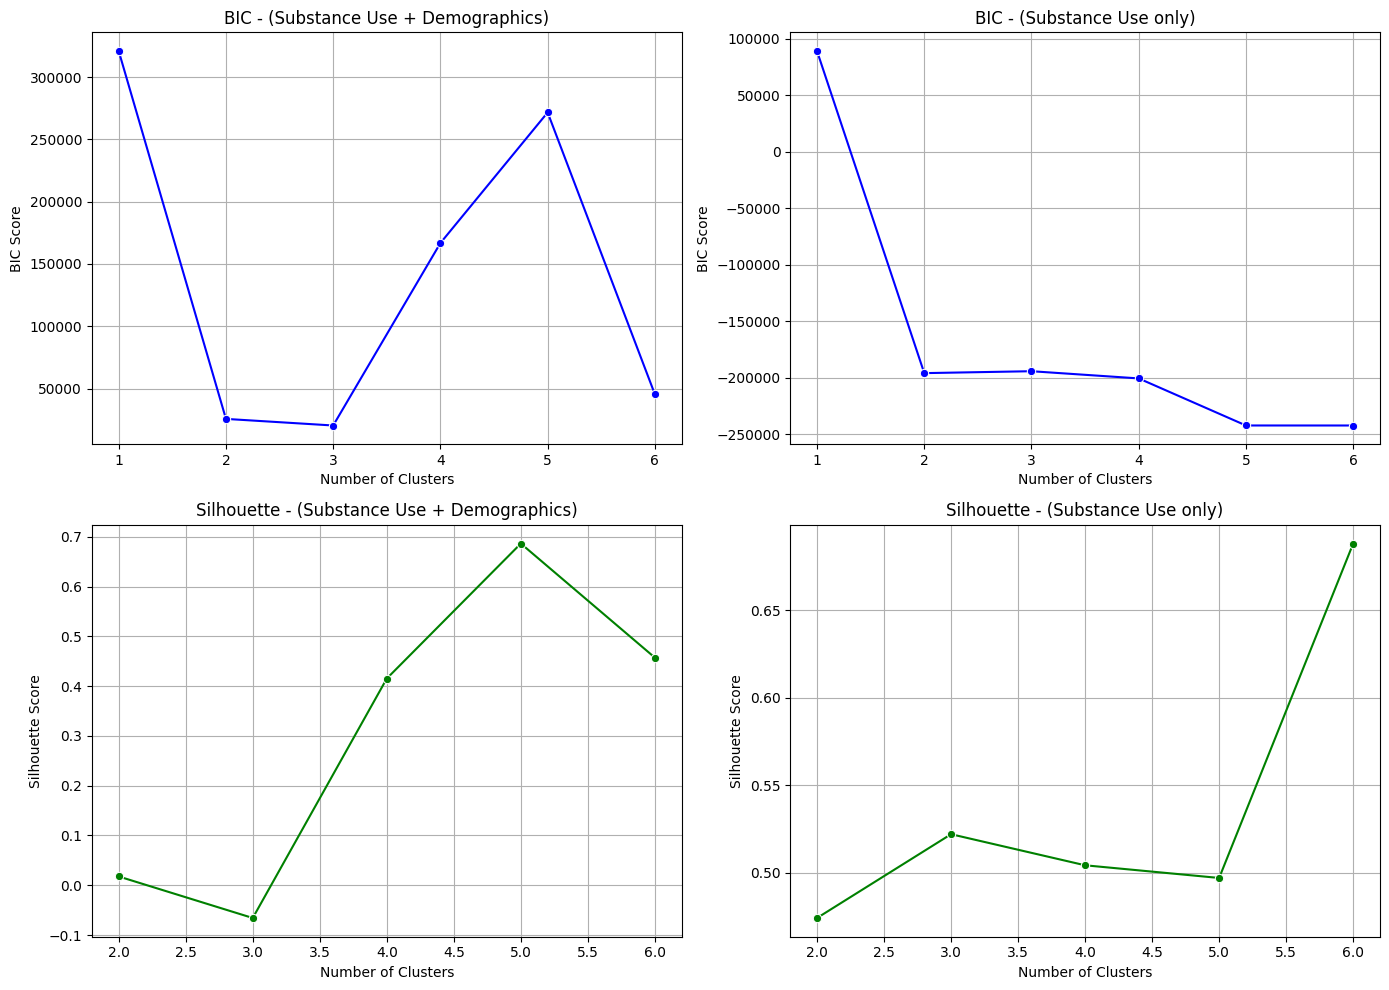

In [324]:
# Plot side-by-side
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BIC - clus_1_data
sns.lineplot(ax=axes[0, 0], x='Clusters', y='BIC', data=BGM_results_1, marker='o', color='blue')
axes[0, 0].set_title('BIC - (Substance Use + Demographics)')
axes[0, 0].set_xlabel('Number of Clusters')
axes[0, 0].set_ylabel('BIC Score')
axes[0, 0].grid(True)

# BIC - clus_2_data
sns.lineplot(ax=axes[0, 1], x='Clusters', y='BIC', data=BGM_results_2, marker='o', color='blue')
axes[0, 1].set_title('BIC - (Substance Use only)')
axes[0, 1].set_xlabel('Number of Clusters')
axes[0, 1].set_ylabel('BIC Score')
axes[0, 1].grid(True)

# Silhouette - clus_1_data
sns.lineplot(ax=axes[1, 0], x='Clusters', y='Silhouette', data=BGM_results_1, marker='o', color='green')
axes[1, 0].set_title('Silhouette - (Substance Use + Demographics)')
axes[1, 0].set_xlabel('Number of Clusters')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].grid(True)

# Silhouette - clus_2_data
sns.lineplot(ax=axes[1, 1], x='Clusters', y='Silhouette', data=BGM_results_2, marker='o', color='green')
axes[1, 1].set_title('Silhouette - (Substance Use only)')
axes[1, 1].set_xlabel('Number of Clusters')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [325]:
# 4 CLASSES
clus_1_data_bgm=clus_1_data.copy()
# Define number of latent classes
n_classes = 6 #4

# Fit LCA model
bgm = BayesianGaussianMixture(n_components=n_classes, covariance_type='diag', random_state=42)
clus_labels = bgm.fit_predict(clus_1_data)

# Add cluster labels to dataset
clus_1_data_bgm["bgm_Cluster"] = clus_labels


In [326]:
# BIC SCORE
compute_bic(bgm,clus_1_data)

np.float64(45382.075055032445)

In [327]:
silhouette_score(clus_1_data, clus_labels) 

np.float64(0.4574174567345994)

In [328]:
# Apply MCA to the clustered data
mca = MCA(n_components=3, random_state=42)

# Perform MCA to reduce dimensions
clus_1_data_bgm['MCA1'], clus_1_data_bgm['MCA2'], clus_1_data_bgm['MCA3']= mca.fit_transform(clus_1_data_bgm.drop(columns='bgm_Cluster')).iloc[:, 0], mca.fit_transform(clus_1_data_bgm.drop(columns='bgm_Cluster')).iloc[:, 1], mca.fit_transform(clus_1_data_bgm.drop(columns='bgm_Cluster')).iloc[:, 2]

# Plot the clusters after MCA
fig = px.scatter_3d(data_frame = clus_1_data_bgm, x='MCA1', y='MCA2', z='MCA3',
              color='bgm_Cluster')
fig.show()

In [329]:
# Contigency table with respective of mental health
contingency_table = pd.crosstab(clus_1_data_bgm['bgm_Cluster'], data["Perceived mental health"])
print(contingency_table)


Perceived mental health    1    2    3    4    5
bgm_Cluster                                     
0                        259  389  337  175   50
1                        561  709  723  311   73
2                        576  635  443  172   32
3                        479  745  680  239   74
4                        504  789  751  295   80
5                        247  480  652  469  179


In [330]:
# Compute the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between clusters and mental health.")
else:
    print("No significant association found.")

Chi-Square Statistic: 571.8034152341625
P-value: 2.4802430591132287e-108
There is a significant association between clusters and mental health.


In [331]:
# Your variables here: replace with your actual DataFrame columns
cramers_v_score = cramers_v(clus_1_data_bgm['bgm_Cluster'], data['Perceived mental health'])
print(f"Cramér's V: {cramers_v_score:.4f}")

Cramér's V: 0.1087


In [332]:
cluster_means = pd.DataFrame(bgm.means_, columns=clus_1_data.columns)
print(cluster_means)

   Age Group    Gender  Province of Residence  \
0   3.766173  1.520673              58.979278   
1   4.050396  1.547744              34.999540   
2   3.672320  1.516157              24.005329   
3   4.693476  1.558341              11.571807   
4   3.882166  1.535759              47.151201   
5   2.826013  1.523604              35.281744   

   Person with disability (self-declared)  Perceived health  \
0                                1.901671          2.293397   
1                                1.888527          2.320148   
2                                1.918729          2.138414   
3                                1.857674          2.388232   
4                                1.884676          2.285253   
5                                2.059841          2.420784   

   Smoking Status (4 levels)  Vaped in the past 30 days (3 levels)  \
0                   3.746137                              2.999886   
1                   3.666757                              2.999942   
2   

In [333]:
from sklearn.metrics import pairwise_distances_argmin_min

representative_idx, _ = pairwise_distances_argmin_min(cluster_means, clus_1_data)
representative_points = clus_1_data.iloc[representative_idx]
print(representative_points)

      Age Group  Gender  Province of Residence  \
1717          4       2                     59   
579           4       2                     35   
56            4       2                     24   
8687          5       2                     12   
4710          4       2                     47   
2465          3       1                     35   

      Person with disability (self-declared)  Perceived health  \
1717                                       2                 2   
579                                        2                 2   
56                                         2                 2   
8687                                       2                 2   
4710                                       2                 2   
2465                                       2                 2   

      Smoking Status (4 levels)  Vaped in the past 30 days (3 levels)  \
1717                          4                                     3   
579                           4         

Perceived mental health     1     2     3     4    5
bgm_Cluster                                         
0                        21.4  32.1  27.9  14.5  4.1
1                        23.6  29.8  30.4  13.1  3.1
2                        31.0  34.2  23.8   9.3  1.7
3                        21.6  33.6  30.7  10.8  3.3
4                        20.8  32.6  31.0  12.2  3.3
5                        12.2  23.7  32.2  23.1  8.8


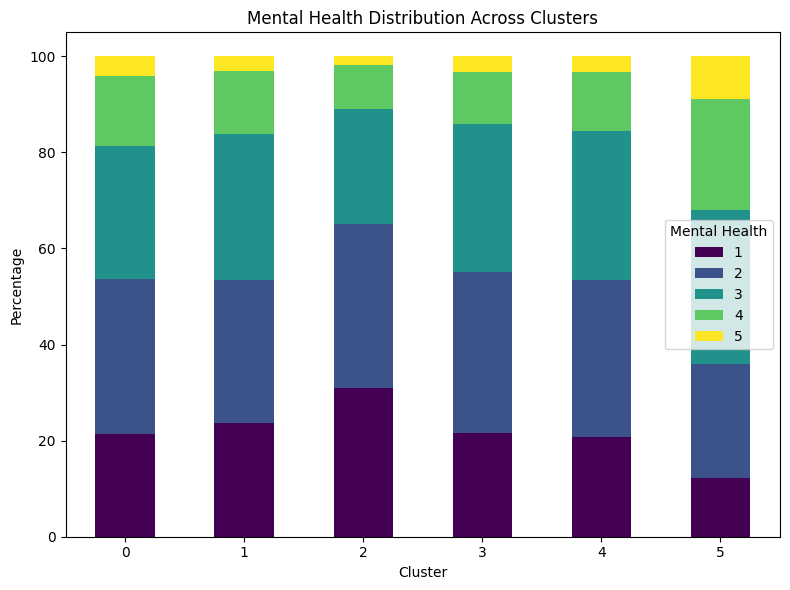

In [334]:
percent_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print(percent_table.round(1))

percent_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Mental Health Distribution Across Clusters")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title="Mental Health")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The Chi-Square test shows that there is a strong statistical link between cluster membership and perceived mental health, with a very small p-value, meaning the result is highly significant. This tells us that people in different clusters tend to report different levels of mental health. However, the strength of this link, measured by Cramér’s V (0.1187), is quite small. This means that while there is a clear association, it is not very strong. So, clusters do reflect some differences in mental health, but other factors might be more important in explaining how people feel about their mental health.

## BGM Model2 - substance use

In [335]:
n_classes = 6  # Number of latent classes
bgm = BayesianGaussianMixture(n_components=n_classes, covariance_type='diag', random_state=42)
clus_labels = bgm.fit_predict(clus_2_data)

clus_2_data_bgm=clus_2_data.copy()
# Add the cluster labels to the original dataset
clus_2_data_bgm["bgm_Cluster"] = clus_labels

In [336]:
# Example: Creating a contingency table
contingency_table = pd.crosstab(clus_2_data_bgm["bgm_Cluster"], data["Perceived mental health"])

# Compute the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between clusters and mental health.")
else:
    print("No significant association found.")


Chi-Square Statistic: 530.4896188764197
P-value: 1.1847717469272417e-99
There is a significant association between clusters and mental health.


In [337]:


# Apply MCA to the clustered data
mca = MCA(n_components=3, random_state=42)

# Perform MCA to reduce dimensions
clus_2_data_bgm['MCA1'], clus_2_data_bgm['MCA2'], clus_2_data_bgm['MCA3']= mca.fit_transform(clus_2_data_bgm.drop(columns='bgm_Cluster')).iloc[:, 0], mca.fit_transform(clus_2_data_bgm.drop(columns='bgm_Cluster')).iloc[:, 1], mca.fit_transform(clus_2_data_bgm.drop(columns='bgm_Cluster')).iloc[:, 2]

# Plot the clusters after MCA
fig = px.scatter_3d(data_frame = clus_2_data_bgm, x='MCA1', y='MCA2', z='MCA3',color='bgm_Cluster')
fig.show()

In [338]:
# Apply MCA to the clustered data
mca = MCA(n_components=3, random_state=42)

# Perform MCA to reduce dimensions (drop cluster column only for transformation)
mca_coords = mca.fit_transform(clus_2_data_bgm.drop(columns='bgm_Cluster'))

# Add MCA components to the dataset
clus_2_data_bgm['MCA1'] = mca_coords.iloc[:, 0]
clus_2_data_bgm['MCA2'] = mca_coords.iloc[:, 1]
clus_2_data_bgm['MCA3'] = mca_coords.iloc[:, 2]

# Plot the clusters after MCA
fig = px.scatter_3d(data_frame=clus_2_data_bgm, x='MCA1', y='MCA2', z='MCA3', color='bgm_Cluster')
fig.show()

In [339]:
# Your variables here: replace with your actual DataFrame columns
cramers_v_score = cramers_v(clus_2_data_bgm["bgm_Cluster"], data['Perceived mental health'])
print(f"Cramér's V: {cramers_v_score:.4f}")


Cramér's V: 0.1047
